# Анализ бизнес-показателей приложения Procrastinate Pro+

Анализируем данные развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка покупок за этот период,
- рекламные расходы.


Необходимо определить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

## Загрузка и предобработка данных

Импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

### Загрузка данных

In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

In [3]:
try:
    orders = pd.read_csv('orders_info_short.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')

In [4]:
try:
    costs = pd.read_csv('costs_info_short.csv')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

Данные о посещениях сайта:

In [5]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device  Channel        Session Start   
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01  \
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Данные о заказах:

In [6]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Данные о стоимости рекламных компаний:

In [7]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

### Приведение названий столбцов к snake_case

Во всех датафреймах названия столбцов не соответствует snake_case. Исправим это.

In [8]:
for df in [visits, orders, costs]:
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    display(df.head())

user_id         region   device  channel        session_start   
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01  \
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

### Преобразование типов данных

Типы данных всех столбцов соответствуют данным, хранящимся в них, кроме столбцов с датой и временем. Преобразуем тип данных в таких столбцах к типу datetime:

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### 1.4 Работа с пропусками

Проверим наличие пропусков в каждом датафрейме:

In [10]:
for df in [visits, orders, costs]:
    display(df.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

В данных отсутствуют пропуски.

### Работа с дубликатами

Проверим данные на наличие дубликатов:

In [11]:
for df in [visits, orders, costs]:
    display(df.duplicated().sum())

0

0

0

В данных отсутствуют дубликаты.

### Выводы по разделу 

- загружены необходимые данные;
- названия столбцов во всех датафреймах приведены к snake_case;
- данные в столбцах с датой и временем преобразованы к формату datetime;
- пропуски и дубликаты в данных отсутствуют.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Зададим функции, которые понадобятся нам для дальнейшего анализа.

### get_profiles() – функция для создания профилей пользователей

Функция принимает датафреймы с информацией о сессиях пользователей в приложении, о заказах и о стоимости рекламных компаний и возвращает датасет с профилями пользователей.

In [12]:
def get_profiles(visits, orders, costs):
    
    # из данных о посещениях выделяем данные пользователей: дата и время первой сессии, регион, устройство, канал привлечения
    profiles = (
        visits
        .sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first',
              'region': 'first',
              'device': 'first',
              'channel': 'first'})
        .rename(columns={'session_start': 'first_dt'})
        .reset_index()
    )
    
    # выделяем месяц привлечения в отдельный столбец
    profiles['first_month'] = pd.DatetimeIndex(profiles['first_dt']).month
    # выделяем дату первой сессии
    profiles['dt'] = profiles['first_dt'].dt.date
    
    # добавляем информацию о том, является ли пользователь платящим
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # считаем число пользователей, привлечённых из одного источника в одну дату
    new_users = (
        profiles
        .groupby(['channel', 'dt'])
        .agg({'user_id': 'count'})
        .rename(columns={'user_id': 'users_number'})
    )
    
    # добавляем информацию о стоимости рекламных компаний к числу привлечённых пользователей
    new_users = new_users.merge(costs, on=['channel', 'dt'], how='left')
    # считаем для каждой пары дата-источник привлечения стоимость привлечения одного пользователя
    new_users['costs'] = new_users['costs'] / new_users['users_number']
    # добавляем в профили пользователей информацию о стоимости привлечения каждого пользователя
    profiles = profiles.merge(new_users.drop(columns='users_number'), on=['channel', 'dt'], how='left')
    # заполняем пропуски в столбце стоимости привлечения, которые появились для органических пользователей
    profiles['costs'] = profiles['costs'].fillna(0)
        
    return profiles

### get_retention() – для подсчёта удержания

Функция принимает датафреймы с информацией о сессиях пользователей в приложении и с профилями пользователей, дату с которой надо проводить анализ, горизонт анализа, список категорий, по которым необходимо группировать данные (по умолчанию список пустой), и нужно ли игнорировать горизонт анализа (по умолчанию игнорируется). 

Функция возвращает датафрейм с данными, используемыми для расчёта удержания, данные по удержанию за рассматриваемый период и данные о том как меняется удержание со временем.

In [13]:
def get_retention(visits, profiles, observation_date, analiz_horizon, dimensions=[], ignore_horizon=False):
    
    # всегда считаем отдельно конверсию для платящих и не платящих пользователей, поэтому добавляем группировку по платежам
    dimensions = ['payer'] + dimensions
    
    # рассчитываем дату позже которой не имеет смысл считать удержание
    last_suitable_acquisition_date = observation_date.date()
    if not ignore_horizon:
        last_suitable_acquisition_date = (observation_date - timedelta(days=analiz_horizon - 1)).date()
    
    # оставляем только данные пользователей, зарегистрированных после полученной даны
    raw_data = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем к данным пользователей данные о сессиях
    raw_data = raw_data.merge(visits[['user_id', 'session_start', 'session_end']], on='user_id', how='left')
    # считаем для каждой сессии лайфтайм
    raw_data['lifetime'] = (raw_data['session_start'] - raw_data['first_dt']).dt.days
    
    # отдельная функция для группировки по необходимым параметрам
    def group_by_dimensions(raw_data, dimensions):
        # создаём сводную таблицу по заданным параметрам, столбцы - лайфтайм, в ячейках - число доживших пользователей
        grouped_data = raw_data.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique')
        # считаем размеры когорт
        cohort_size = raw_data.groupby(dimensions).agg({'user_id': 'nunique'})
        # объединяем сводную таблицу с размерами когорт
        grouped_data = cohort_size.merge(grouped_data, on=dimensions, how='left').rename(columns={'user_id': 'cohort_size'})
        # делим число пользователей в каждой группе каждого лайфтайма на размер когорты, чтобы получить удержание
        grouped_data = grouped_data.div(grouped_data['cohort_size'], axis=0)
        # возвращаем в сводную таблицу данные о размерах когорт
        grouped_data['cohort_size'] = cohort_size
        # оставляем столбцы только с лайфтаймом не больше горизонта анализа
        grouped_data = grouped_data[['cohort_size'] + list(range(analiz_horizon))]
        
        return grouped_data
    # получаем таблицу удержания по платящим/не платящим пользователям и заданным параметрам
    result = group_by_dimensions(raw_data, dimensions)
    # получаем таблицу удержания по тем же параметрам с изменением в динамике
    result_in_time = group_by_dimensions(raw_data, dimensions + ['dt'])
    
    return raw_data, result, result_in_time

### get_conversion() – функция для подсчёта конверсии

Функция принимает датафреймы с информацией о сессиях пользователей в приложении и с профилями пользователей, дату с которой надо проводить анализ, горизонт анализа, список категорий, по которым необходимо группировать данные (по умолчанию список пустой), и нужно ли игнорировать горизонт анализа (по умолчанию игнорируется). 

Функция возвращает датафрейм с данными, используемыми для расчёта конверсии, данные по конверсии за рассматриваемый период и данные о том как меняется конверсия со временем.

In [14]:
def get_conversion(orders, profiles, observation_date, analiz_horizon, dimensions=[], ignore_horizon=False):
    
    # рассчитываем дату позже которой не имеет смысл считать конверсию
    last_suitable_acquisition_date = observation_date.date()
    if not ignore_horizon:
        last_suitable_acquisition_date = (observation_date - timedelta(days=analiz_horizon - 1)).date()       
        
    # оставляем только данные пользователей, зарегистрированных после полученной даны
    raw_data = profiles.query('dt <= @last_suitable_acquisition_date')
    # вычисляем дату первой покупки для каждого пользователя
    first_orders = orders.groupby('user_id').agg({'event_dt': 'min'})
    # добавляем данные о первых покупках к данным пользователей
    raw_data = raw_data.merge(first_orders, on='user_id', how='left').rename(columns={'event_dt': 'fist_purchase_dt'})
    # вычисляем число дней, которые прошли с установки, когда была совершена первая покупка
    raw_data['conversion_day'] = (raw_data['fist_purchase_dt'] - raw_data['first_dt']).dt.days
    
    # если не заданы никакие параметры для группировки добавляем параметр "все пользователи" и соответствующий столбец 
    if dimensions == []:
        raw_data['all_users'] = 'all_users'
        dimensions = ['all_users']
    
    # отдельная функция для группировки данных и вычисления конверсии по этим группам
    def group_by_dimensions(raw_data, dimensions):
        # группируем данные по числу дней до первой покупки и считаем число уникальных пользователей
        grouped_data = (
            raw_data
            .pivot_table(index=dimensions, 
                         columns='conversion_day', 
                         values='user_id', 
                         aggfunc='nunique')
            .fillna(0)
        )
        # нарастающим итогом считаем число первых покупок по дням
        grouped_data = grouped_data.cumsum(axis=1)
        # считаем размеры когорт
        cohort_size = raw_data.groupby(dimensions).agg({'user_id': 'nunique'})
        # добавляем размеры когорт к группированным данным
        grouped_data = cohort_size.merge(grouped_data, on=dimensions, how='left').rename(columns={'user_id': 'cohort_size'})
        # делим на размеры когорт
        grouped_data = grouped_data.div(grouped_data['cohort_size'], axis=0)
        # возвращаем информацию о размере когорт
        grouped_data['cohort_size'] = cohort_size
        # ограничиваем выдачу только горизонтом анализа
        grouped_data = grouped_data[['cohort_size'] + list(range(analiz_horizon))]
        
        return grouped_data
    # считаем конверсию по выбранным параметрам
    result = group_by_dimensions(raw_data, dimensions)
    # если никакие дополнительные параметры не выбраны убираем категорию "все пользователи" для расчёта конверсии в динамике
    if 'all_users' in dimensions:
        dimensions = []
    # рассчитываем конверсию в динамике
    result_in_time = group_by_dimensions(raw_data, dimensions + ['dt'])
    
    return raw_data, result, result_in_time

### get_ltv() – функция для подсчёта LTV и ROI

Функция принимает датафреймы с информацией о сессиях пользователей в приложении и с профилями пользователей, дату с которой надо проводить анализ, горизонт анализа, список категорий, по которым необходимо группировать данные (по умолчанию список пустой), и нужно ли игнорировать горизонт анализа (по умолчанию игнорируется). 

Функция возвращает датафрейм с данными, используемыми для расчёта LTV и ROI, данные по LTV за рассматриваемый период, данные о том как меняется LTV со временем, данные по ROI за рассматриваемый период и данные о том как меняется ROI со временем, 

In [15]:
def get_ltv(orders, profiles, observation_date, analiz_horizon, dimensions=[], ignore_horizon=False):
    
    # рассчитываем дату позже которой не имеет смысл считать конверсию
    last_suitable_acquisition_date = observation_date.date()
    if not ignore_horizon:
        last_suitable_acquisition_date = (observation_date - timedelta(days=analiz_horizon - 1)).date()       
        
    # оставляем только данные пользователей, зарегистрированных после полученной даны
    raw_data = profiles.query('dt <= @last_suitable_acquisition_date')
    # объединяем профили пользователей с заказами
    raw_data = raw_data.merge(orders, on='user_id', how='left')
    # рассчитываем лайфтайм для каждого пользователя
    raw_data['lifetime'] = (raw_data['event_dt'] - raw_data['first_dt']).dt.days
    
    # если не заданы никакие параметры для группировки добавляем параметр "все пользователи" и соответствующий столбец 
    if dimensions == []:
        raw_data['all_users'] = 'all_users'
        dimensions = ['all_users']
    
    def group_by_dimensions(raw_data, dimensions):
    # вспомогательная функция для группирования данных по определённым категориям
    # принимает на вход объединённые данные о пользователях и их заказах, возвращает сгруппированные данные и рассчитанную roi
        
        # создаём сводную таблицу, где строки - заданные категории, столбцы - лайфтайм, значения – сумма выручки
        grouped_data = raw_data.pivot_table(index=dimensions, columns='lifetime', values='revenue', aggfunc='sum').fillna(0)
        # считаем накопительную выручку
        grouped_data = grouped_data.cumsum(axis=1)
        # считаем размеры когорт
        cohort_size = raw_data.groupby(dimensions).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})
        # присоединяем к размерам когорт сгруппированные данные о накопительной выручке по лайфтаймам
        grouped_data = cohort_size.merge(grouped_data, on=dimensions, how='left')
        # делим накопительную выручку по лайфтаймам на размер когорт, чтобы получить выручку на одного пользователя
        grouped_data = grouped_data.div(grouped_data['cohort_size'], axis=0)
        # возвращаем размер когорт
        grouped_data['cohort_size'] = cohort_size
        # оставляем только данные за горизонт анализа
        grouped_data = grouped_data[['cohort_size'] + list(range(analiz_horizon))]
        
        # для расчёта CAC в исходных данных оставляем только номер пользователя, стоимость его привлечения и категории анализа
        cac = raw_data[['user_id', 'costs'] + dimensions].drop_duplicates()
        # группируем информацию по категориям анализа, считая для каждой среднюю стоимость привлечения
        cac = cac.groupby(dimensions).agg({'costs': 'mean'}).rename(columns={'costs': 'cac'})
        
        # для расчёта ROI сгруппированные данные делим на соответствующие значения CAC
        roi = grouped_data.div(cac['cac'], axis=0)
        # отбрасываем когорты для которых CAC оказался равен нулю
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        # возвращаем значения размеров когорт
        roi['cohort_size'] = cohort_size
        # добавляем в таблицу c ROI информацию о CAC
        roi['cac'] = cac['cac']
        # оставляем только ROI за горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(analiz_horizon))]
        
        return grouped_data, roi
    
    result, roi = group_by_dimensions(raw_data, dimensions)
    # если никакие дополнительные параметры не выбраны убираем категорию "все пользователи" для расчёта конверсии в динамике
    if 'all_users' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(raw_data, dimensions+['dt'])
    
    
    return raw_data, result, result_in_time, roi, roi_in_time

### filter_data() – функция для сглаживания данных под графики

Функция принимает датафрейм, данные в котором необходимо сгладить, и величину окна сглаживания. 

Функция возвращает датафрейм со сглаженными данными.

In [16]:
def filter_data(df, window):
    # проходим по всем столбцам датарфейма
    for column in df.columns.values:
        # сглаживаем значения функцией mean
        df[column] = df[column].rolling(window).mean()
    return df

### plot_retention() – функция для построения графика Retention Rate

Функция принимает на вход информацию об удержании и об изменении удержания во времени, а также горизонт анализа и величину окна для сглаживания данных. 

Функция строит графики удержания платящих пользователей, не платящих пользователей, а также графики динамики удержания платящих и не платящих пользователей, пришедших в последний день горизонта анализа.

In [17]:
def plot_retention(retention, retention_in_time, horizon, window):
    
    # убираем из входных данных лишнюю информацию
    retention = retention.drop(columns=['cohort_size', 0])
    retention_in_time = retention_in_time.drop(columns=['cohort_size'])[[horizon - 1]]
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    
    # строим график удержания платящих пользователей
    plt.figure(figsize=(15,10))
    ax1 = plt.subplot(2,2,1)                        
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    
    # строим график удержания не платящих пользователей
    ax2 = plt.subplot(2,2,2, sharey=ax1) 
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание не платящих пользователей')
    
    # строим график динамики удержания платящих пользователей на заданный день
    ax3 = plt.subplot(2,2,3)
    columns = [name for name in retention_in_time.index.names if name not in ['dt', 'payer']]
    filtered_data = retention_in_time.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))
    
    # строим график динамики удержания не платящих пользователей на заданный день
    ax4 = plt.subplot(2,2,4, sharey=ax3)
    filtered_data = retention_in_time.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания не платящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show() 

### plot_conversion() – функция для построения графиков конверсии

Функция принимает на вход информацию о конверсии и об изменении конверсии во времени, а также горизонт анализа и величину окна для сглаживания данных. 

Функция строит графики конверсии пользователей, а также динамику конверсии пользователей, пришедших в последний день горизонта анализа.

In [18]:
def plot_conversion(conversion, conversion_in_time, horizon, window):
    
    # убираем из входных данных лишнюю информацию
    conversion = conversion.drop(columns=['cohort_size', 0])
    conversion_in_time = conversion_in_time.drop(columns=['cohort_size'])[[horizon - 1]]
    
    # строим график конверсии
    plt.figure(figsize=(15,6))
    ax1 = plt.subplot(1,2,1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    
    # строим график динамики конверсии на заданный день
    ax2 = plt.subplot(1,2,2, sharey=ax1)
    columns = [name for name in conversion_in_time.index.names if name not in ['dt', 'payer']]
    filtred_data = conversion_in_time.pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtred_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### plot_ltv_roi() – функция для визуализации LTV и ROI

Функция принимает на вход информацию об LTV, о динамике LTV, ROI, динамике ROI, горизонте анализа и окне сглаживания графиков.

Функция строит графики LTV, динамики LTV пользователей, пришедших в последний день горизонта анализа, динамики стоимости привлечения пользователей, ROI и динамики ROI пользователей, пришедших в последний день горизонта анализа.

In [19]:
def plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon, window):
    plt.figure(figsize=(20, 20))
    
    # убираем из входных данных лишнюю информацию
    ltv = ltv.drop(columns='cohort_size')
    ltv_in_time = ltv_in_time.drop(columns='cohort_size')[[horizon - 1]]
    
    cac_in_time = roi_in_time[['cac']]
    
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_in_time = roi_in_time.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]
    
    # строим график LTV
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.title('LTV')
    plt.xlabel('Лайфтайм')
    
    # строим график динамики LTV пользователей на заданный день
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_in_time.index.names if name not in ['dt', 'payer']]
    filtered_data = ltv_in_time.pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика LTV пользователей на {horizon}-й день')
    
    # строим график динамики стоимости привлечения пользователей
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_in_time.index.names if name not in ['dt', 'payer']]
    filtered_data = cac_in_time.pivot_table(index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика стоимости привлечения пользователей')
    
    # строим график ROI
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    
    # строим график динамики ROI на заданный день
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_in_time.index.names if name not in ['dt', 'payer']]
    filtered_data = roi_in_time.pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика ROI пользователей на {horizon}-й день')
    
    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных пользовательских профилей

Используем функцию из раздела 2.1 для создания профилей пользователей.

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_dt         region  device     channel   
0    599326 2019-05-07 20:58:57  United States     Mac    FaceBoom  \
1   4919697 2019-07-09 12:46:07  United States  iPhone    FaceBoom   
2   6085896 2019-10-01 09:58:33         France  iPhone     organic   
3  22593348 2019-08-22 21:35:48        Germany      PC  AdNonSense   
4  31989216 2019-10-02 00:07:44  United States  iPhone     YRabbit   

   first_month          dt  payer     costs  
0            5  2019-05-07   True  1.088172  
1            7  2019-07-09  False  1.107237  
2           10  2019-10-01  False  0.000000  
3            8  2019-08-22  False  0.988235  
4           10  2019-10-02  False  0.230769

### Минимальная и максимальная дата привлечения

Определим минимальную дату привлечения пользователей.

In [21]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

Определим максимальную дату привлечения пользователей.

In [22]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

В предоставленных данных содержится информация о пользователях, привлечённых в период с 01.05.2019 по 27.10.2019.

### Анализ распределения пользователей по регионам

Всего пользователей привлечено с 01.05.2019 по 27.10.2019:

In [23]:
users = profiles['user_id'].nunique()
users

150008

Также подсчитаем число платящих пользователей, привлечённых за этот период:

In [24]:
payer_users = profiles['payer'].sum()
payer_users

8881

Определяем разбивку пользователей по регионом и долю платящих пользователей в каждом регионе.

In [25]:
users_by_region = (
    profiles
    # группируем пользователей по регионам
    .groupby('region')
    # для каждого региона считаем число пользователей и среднее число платящих пользователей
    .agg({'user_id': 'count', 'payer': 'mean'})
    # переименовываем столбцы
    .rename(columns={'user_id': 'number_of_users', 'payer': 'payer_part'})
)
# создаём дополнительный столбец с информацией о том какую долю составляют пользователи каждого региона от общего числа
users_by_region['region_part'] = users_by_region['number_of_users'] / users
# оставляем только нужные столбцы в таблице
users_by_region = users_by_region[['number_of_users', 'region_part', 'payer_part']]
# сортируем данные по доле пользователей от общего числа по убыванию
users_by_region.sort_values('payer_part', ascending=False)

number_of_users  region_part  payer_part
region                                                 
United States           100002     0.666644    0.069019
Germany                  14981     0.099868    0.041119
UK                       17575     0.117160    0.039829
France                   17450     0.116327    0.037994

По полученным данным можно сделать следующие выводы:
- всего пользователей в период с 01.05.2019 по 27.10.2019 привлечено 150008, из них платящих – 8881;
- из них более 66% – пользователи из США, пользователей из Франции, Германии, Великобритании – по 10-12%;
- наибольшая доля платящих пользователей тоже в США – около 7%, во всех остальных странах – около 4%.

### Анализ распределения пользователей по устройствам

Определяем разбивку пользователей по используемым устройствам и долю платящих пользователей для каждого устройства.

In [26]:
users_by_device = (
    profiles
    # группируем пользователей по устройствам
    .groupby('device')
    # для каждого типа устройства считаем число пользователей и среднее число платящих пользователей
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    # переименовываем столбцы
    .rename(columns={'user_id': 'number_of_users', 'payer': 'payer_part'})
)

# создаём дополнительный столбец с информацией о том какую долю составляют пользователи разных устройств от общего числа
users_by_device['device_part'] = users_by_device['number_of_users'] / users
# оставляем только нужные столбцы в таблице
users_by_device = users_by_device[['number_of_users', 'device_part', 'payer_part']]
# сортируем данные по доле пользователей от общего числа по убыванию
users_by_device.sort_values('payer_part', ascending=False)

number_of_users  device_part  payer_part
device                                           
Mac                30042     0.200269    0.063644
iPhone             54479     0.363174    0.062079
Android            35032     0.233534    0.058518
PC                 30455     0.203023    0.050468

Из данных таблицы видно:
- больше всех пользователей пользуются айфонами – более 36%, устройствами на Андроид – более 23%, маками и ПК – по 20%;
- доля платящих пользователей больше всего на айфонах и маках – более 6%;
- на устройствах под управлением андроида процент платящих пользователей немного ниже 6%;
- меньше всего платящих пользователей на ПК – немного больше 5%.

### Анализ распределения пользователей по каналам привлечения

Определяем разбивку пользователей по каналам привлечения и долю платящих пользователей для каждого канала.

In [27]:
users_by_channel = (
    profiles
    # группируем пользователей по каналам 
    .groupby('channel')
    # для канала считаем число пользователей и среднее число платящих пользователей
    .agg({'user_id': 'nunique', 'payer': 'mean', })
    # переименовываем столбцы
    .rename(columns={'user_id': 'number_of_users', 'payer': 'payer_part'})
)
# создаём дополнительный столбец с информацией о том какую долю составляют пользователи, привлечённых по разным каналам
users_by_channel['channel_part'] = users_by_channel['number_of_users'] / users
# оставляем только нужные столбцы в таблице
users_by_channel = users_by_channel[['number_of_users', 'channel_part', 'payer_part']]
# сортируем данные по доле пользователей от общего числа по убыванию
users_by_channel.sort_values('payer_part', ascending=False)

number_of_users  channel_part  payer_part
channel                                                      
FaceBoom                      29144      0.194283    0.122049
AdNonSense                     3880      0.025865    0.113402
lambdaMediaAds                 2149      0.014326    0.104700
TipTop                        19561      0.130400    0.096007
RocketSuperAds                 4448      0.029652    0.079137
WahooNetBanner                 8553      0.057017    0.052964
YRabbit                        4312      0.028745    0.038265
MediaTornado                   4364      0.029092    0.035747
LeapBob                        8553      0.057017    0.030633
OppleCreativeMedia             8605      0.057364    0.027077
organic                       56439      0.376240    0.020553

Из данных таблицы видно:
- больше всего пользователей приходит сами по себе, число органических пользователей – более 56 тыс. (это более 37% всех привлечённых пользователей), среди них самый низкий процент платящих пользователей – всего 2%;
- на втором месте по числу привлечённых пользователей FaceBoom с почти 30 тыс. (более 19%) пользователей, этот же источник занимает первое место по доле платящих пользователей – более 12%;
- на третьем месте по числу привлечённых пользователей TipTop – почти 20 тыс. пользователей (13%), из них платящих – 9,6%;
- также стоит отметить AdNonSense и lambdaMediaAds, которые занимают предпоследнее и последнее место по числу привлечённых пользователей (3880 и 2149 пользователей соответственно), но по доле платящих пользователей находятся на втором и третьем месте – более 11 и 10% соответственно;
- остальные каналы имеют меньшее число привлечённых пользователей и меньшую долю платящих пользователей.

### Выводы по разделу

По результатам анализа профилей пользователей, привлечённых с 01.05.2019 по 27.10.2019, делаем следующие выводы:
- всего привлечено 150008 уникальных пользователей;
- 66% этих пользователей из США, из Франции, Германии, Великобритании – по 10-12%;
- 36% пользуются айфонами – более 36%, устройствами на Андроид – более 23%, маками и ПК – по 20%;
- более 37% новых пользователей приходят сами, лидерами по числу привлечённых пользователей являются FaceBoom – более 19% и TipTop – 13%, остальные рекламные площадки за рассматриваемый период привлекли меньше пользователей;
- платящих пользователей привлечено 8881;
- наибольшая доля платящих пользователей от всех привлечённх в США – около 7%, во всех остальных странах – около 4%;
- среди устройств доля платящих пользователей больше всего на айфонах и маках – более 6%, на андроиде – немного ниже 6%, на ПК – немного больше 5%;
- наибольший процент платящих пользователей приходит через FaceBoom – 12% от новых пользователей, пришедших через эту площадку, на втором месте AdNonSense – 11%, на третьем lambdaMediaAds – 10%

Делать на основе этих данных выводы об успешности того или иного канала привлечения пока что рано, поскольку здесь не учтена стоимость привлечения пользователей.

## Анализ маркетинговых расходов

Необходимо проанализировать расходы на рекламу

### Общая сумма расходов на маркетинг

Общая сумма расходов на маркетинг

In [28]:
costs_total = costs['costs'].sum()
costs_total

105497.30000000002

In [29]:
costs['dt'].min()

datetime.date(2019, 5, 1)

In [30]:
costs['dt'].max()

datetime.date(2019, 10, 27)

Общая сумма расходов на маркетинг в период c 01.05.2019 по 27.10.2019 составляет 105497,3 рублей.

### Распределение рекламного бюджета по каналам привлечения

Рассчитаем как за рассматриваемый период распределялся бюджет между рекламными платформами.

In [31]:
# группируем данные по каналам привлечения и считаем суммарную стоимость по каждому каналу
costs_by_channel = costs.groupby('channel').agg({'costs': 'sum'})
# считаем долю от общих рекламных расходов для каждого канала
costs_by_channel['costs_part'] = costs_by_channel['costs'] / costs_total
# сортируем данные по объёму расходов среди каналов по убыванию
costs_by_channel.sort_values('costs', ascending=False)

costs  costs_part
channel                                 
TipTop              54751.30    0.518983
FaceBoom            32445.60    0.307549
WahooNetBanner       5151.00    0.048826
AdNonSense           3911.25    0.037074
OppleCreativeMedia   2151.25    0.020392
RocketSuperAds       1833.00    0.017375
LeapBob              1797.60    0.017039
lambdaMediaAds       1557.60    0.014764
MediaTornado          954.48    0.009047
YRabbit               944.22    0.008950

Из данных таблицы видно что:
- более 50% всего рекламного бюджета было потрачено на рекламу в TipTop, более 54 тыс.;
- более 30% рекламного бюджета – FaceBoom, более 32 тыс.;
- траты на все остальные рекламные площадки по отдельности не превышали 10%.

### Графики распределения по времени рекламных трат на разные источники

Разобьём рекламные компании на недели и месяцы, когда они проводились.

In [32]:
# выделяем из даты рекламной компании номер недели и сохраняем в отдельный столбец
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
# выделяем из даты рекламной компании номер месяца и сохраняем в отдельный столбец
costs['month'] = pd.to_datetime(costs['dt']).dt.month

In [33]:
costs.head(10)

dt   channel  costs  week  month
0  2019-05-01  FaceBoom  113.3    18      5
1  2019-05-02  FaceBoom   78.1    18      5
2  2019-05-03  FaceBoom   85.8    18      5
3  2019-05-04  FaceBoom  136.4    18      5
4  2019-05-05  FaceBoom  122.1    18      5
5  2019-05-06  FaceBoom  118.8    19      5
6  2019-05-07  FaceBoom  101.2    19      5
7  2019-05-08  FaceBoom  100.1    19      5
8  2019-05-09  FaceBoom   93.5    19      5
9  2019-05-10  FaceBoom  104.5    19      5

   
Строим сначала общий график трат на рекламу по месяцам и неделям. 
   

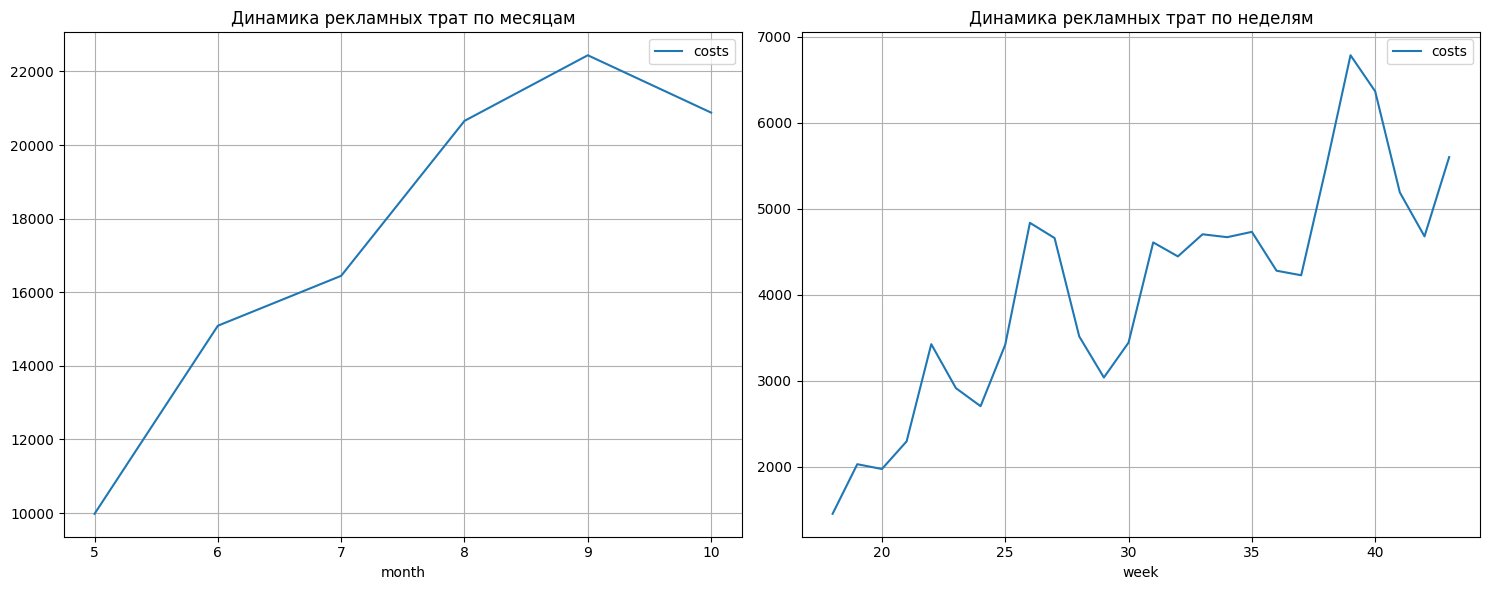

In [34]:
plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
costs.groupby('month').agg({'costs': 'sum'}).plot(grid=True, ax=ax1)
plt.title('Динамика рекламных трат по месяцам')
ax2 = plt.subplot(1,2,2)
costs.groupby('week').agg({'costs': 'sum'}).plot(grid=True, ax=ax2)
plt.title('Динамика рекламных трат по неделям')
plt.tight_layout()
plt.show()

Теперь построим графики трат на рекламу в различных сетях по месяцам и неделям.

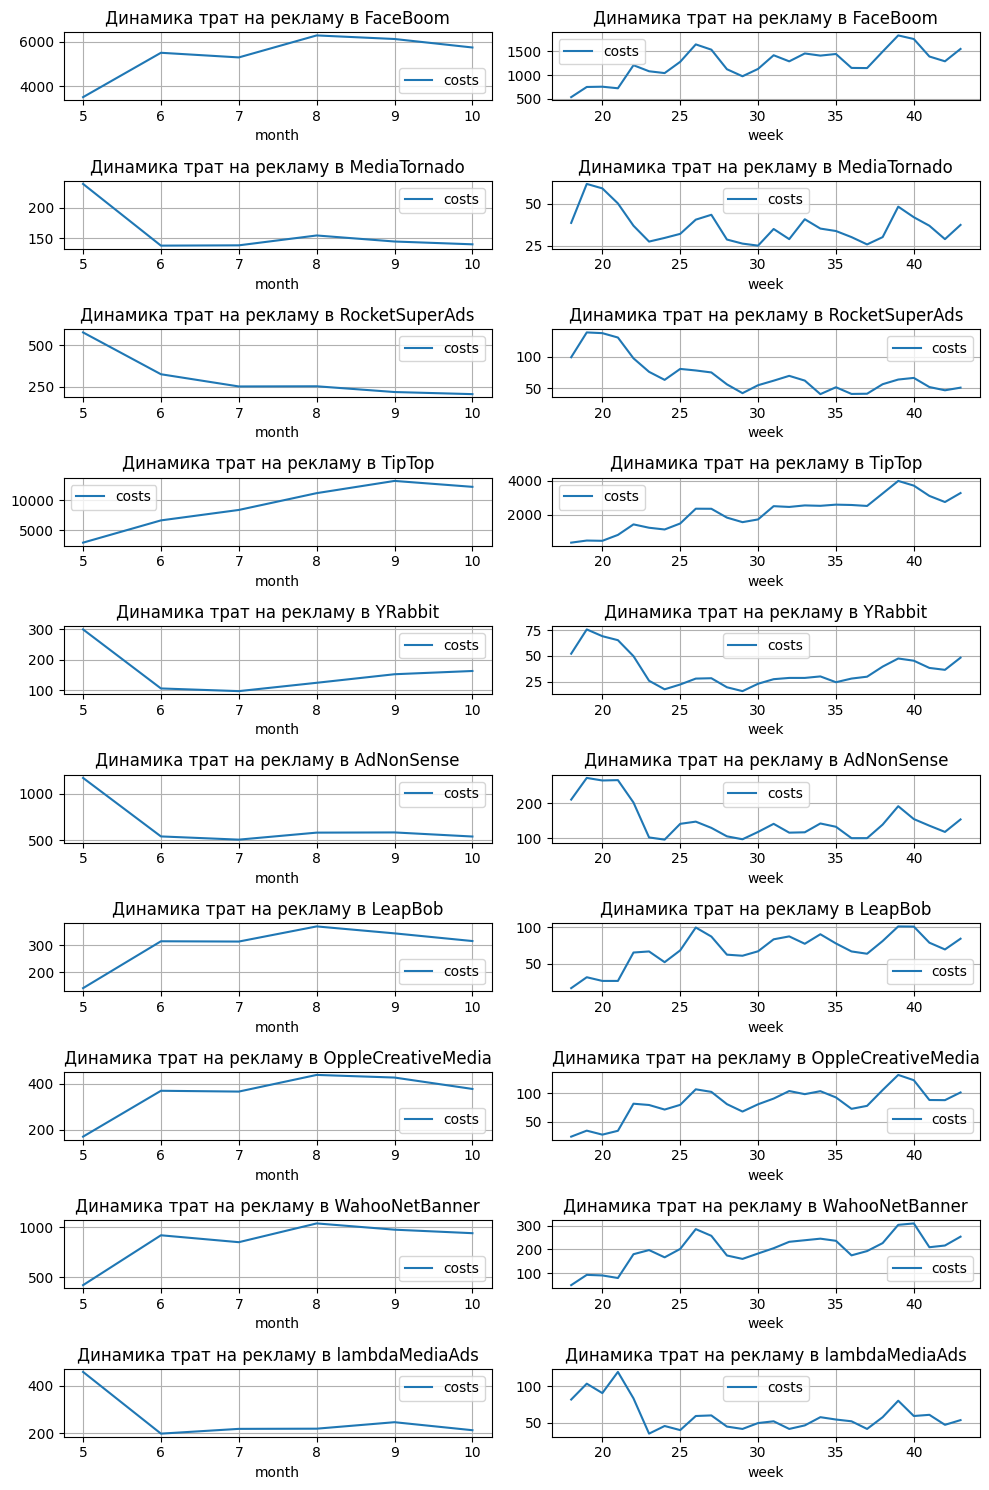

In [35]:
# создаём список каналов
channels = costs['channel'].unique()

plt.figure(figsize=(10,15))

# в цикле проходим по пронумерованному списку каналов, в каждом шаге мы получаем номер шага и имя канала
for i, channel in enumerate(channels):
    # в цикле проходим по пронумерованному списку месяцев и недель, в каждом шаге мы получаем номера шага, месяца и недели
    for j, time_measure in enumerate(['month', 'week']):
        # для текущего канала находим стоимость рекламы по неделями или месяцам
        data_to_plot = costs.query('channel == @channel').groupby(time_measure).agg({'costs': 'sum'})
        # строим графики для текущего канала по месяцам, а потом по неделям в соседних ячейках
        data_to_plot.plot(grid=True, ax = plt.subplot(len(channels), 2 , i*2 + j + 1))
        plt.title(f'Динамика трат на рекламу в {channel}')

plt.tight_layout()
plt.show()

Из графиков видно, что:
- общие затраты на маркетинг росли в течение рассматриваемого периода;
- доли бюджета на маркетинг, выделенные на рекламу на различных площадках, менялись в течении рассматриваемого периода;
- каналы привлечения, траты на которые росли в течении года: FaceBoom, TipTop, LeapBob, OppleCreativeMedia, WahooNetBanner;
- каналы привлечения, траты на которые снижались в течении года: MediaTornado, RocketSuperAds, YRabbit, AdNonSense, lambdaMediaAds; 
- недельные затраты на рекламу в FaceBoom выросли более чем в три раза, а на рекламу в TipTop – примерно в четыре раза.

### Стоимость привлечения одного пользователя по источникам

Рассчитаем среднюю стоимость привлечения пользователя из каждого источника.

In [36]:
profiles.groupby('channel').agg({'costs': 'mean'}).sort_values('costs', ascending=False)

costs
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
organic             0.000000

Из таблицы видно, что:
- самая дорогая реклама в TipTop – в среднем около 2.8 доллара за пользователя;
- самая дешёвая реклама в LeapBob – в среднем около 0.21 доллара за пользователя.

### Выводы по разделу

По результатам анализа затрат на маркетинг с 01.05.2019 по 27.10.2019, делаем следующие выводы:
- общие затраты на маркетинг в рассматриваемый период составили 105497 долларов;
- более 50% (54 тыс.долларов) всего рекламного бюджета было потрачено на рекламу в TipTop, более 30% (32 тыс.долларов) –  на рекламу в FaceBoom, траты на все остальные рекламные площадки по отдельности не превышали 10%;
- доли бюджета на маркетинг, выделенные на рекламу на различных площадках, менялись в течении рассматриваемого периода: росли траты на рекламу в FaceBoom, TipTop, LeapBob, OppleCreativeMedia, WahooNetBanner, сокращались – MediaTornado, RocketSuperAds, YRabbit, AdNonSense, lambdaMediaAds;
- в среднем самая дорогая реклама в TipTop – 2.8 доллара за пользователя, а самая дешёвая в LeapBob – 0.21 доллара за пользователя.

## Оценка окупаемости рекламы

Анализ проводится на 1 ноября 2019 года.

В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [37]:
observation_date = datetime(2019, 11, 1)
horizon = 14

In [38]:
window = 7

   
Из дальнейшего анализа исключаем органических пользователей, поскольку на них не тратится рекламный бюджет, а значит на окупаемость рекламы они не влияют. 

In [39]:
profiles_without_organic = profiles.query('channel != "organic"')

### Общий анализ окупаемости рекламы

Рассчитаем LTV, ROI, их изменение в динамике для 14го дня, динамику изменения CAC и построим их графики.

In [40]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(orders, profiles_without_organic, observation_date, horizon)

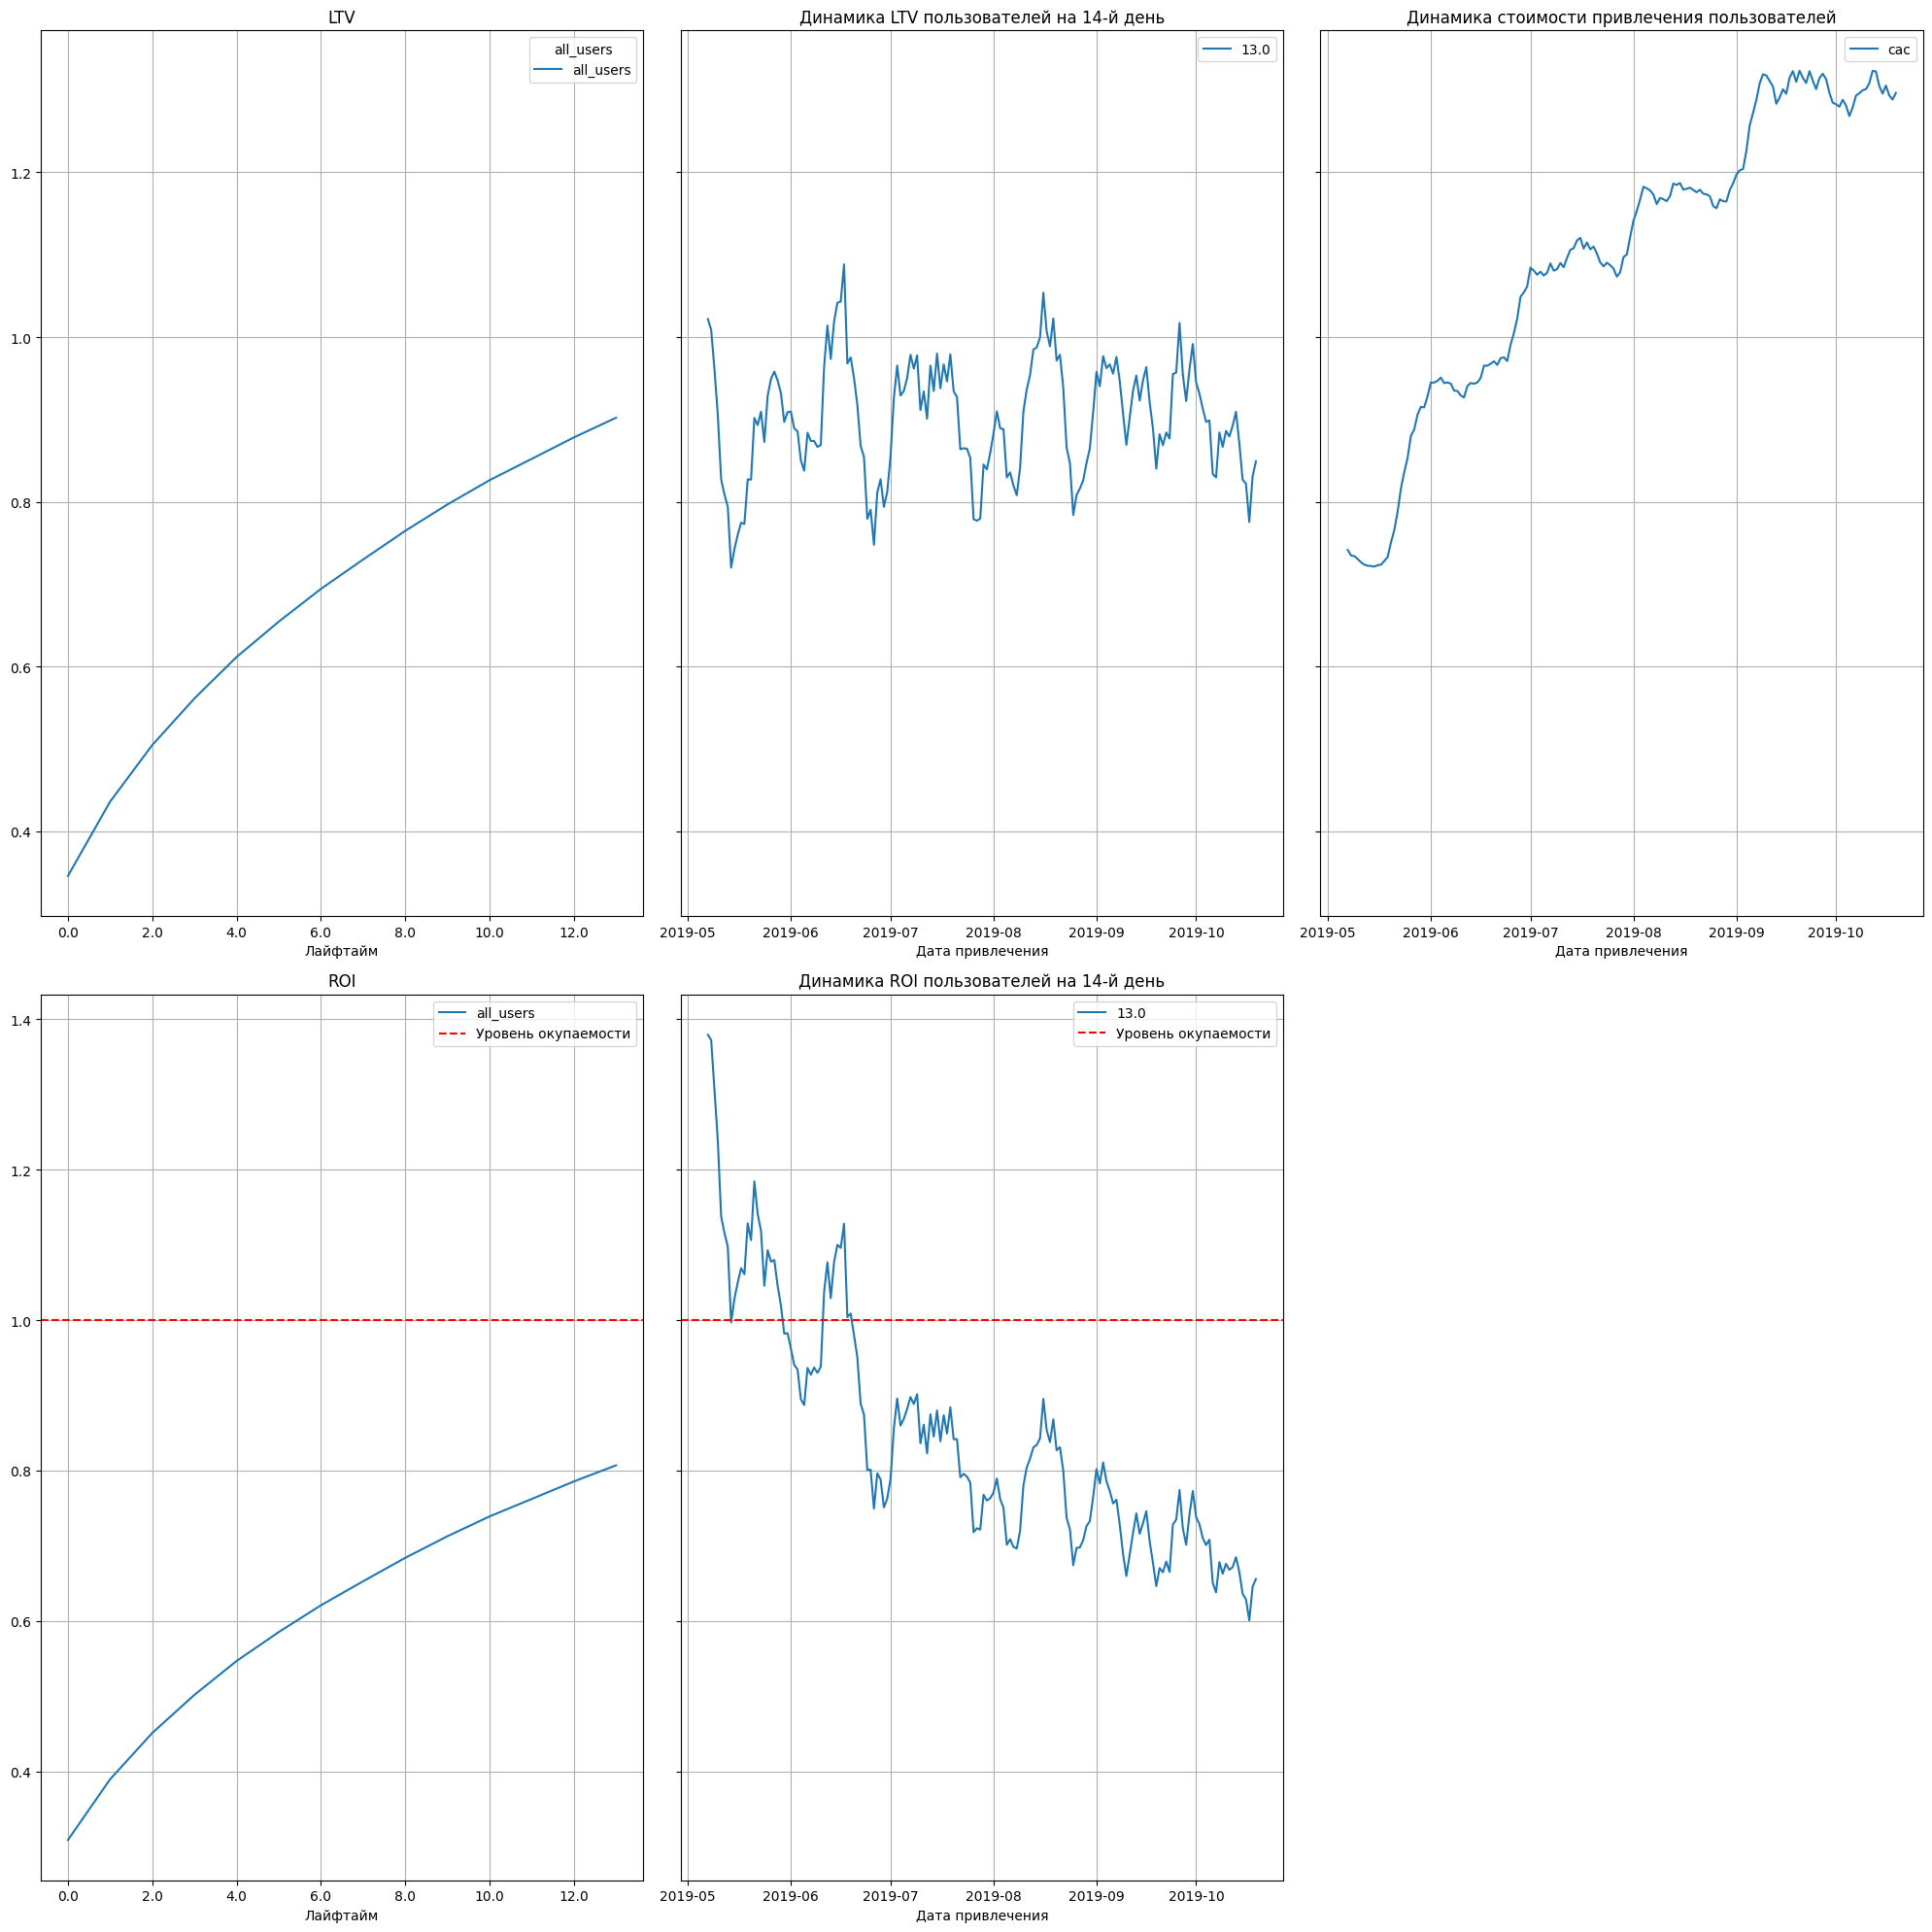

In [41]:
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon, window)

Выводы по графикам:
- график LTV растёт на протяжении всего лайфтайма пользователей, как и должно быть;
- на графике динамики LTV за рассматриваемый период видно колебание LTV пользователей вокруг величины 0,9 доллара на пользователя, со временем не наблюдается устойчивого роста LTV, впрочем и падения тоже не наблюдается;
- из графика же динамики стоимости привлечения клиентов видно, что стоимость привлечения одного пользователя на протяжении почти всего рассматриваемого периода выросла от чуть более 0.7 долларов за пользователя до 1.3 долларов за пользователя;
- кривая ROI на 14й день после привлечения не дотягивается до прямой окупаемости, а значит затраты на рекламу не окупаются;
- на графике динамики ROI пользователей на 14й день в динамике видно, что примерно с мая по июль затраты на рекламу окупались, а затем перестали;
- стагнирование величины трат одного пользователя за 14-дневный лайфтайм и постоянно растущие траты на рекламу привели к тому, что в июле затраты на рекламу перестали окупаться.

Общий вывод – затраты на привлечения пользователей за рассматриваемый период не окупились.

### Анализ конверсии пользователей

   
Сначала построим общие графики конверсии пользователей.

In [42]:
conversion_raw, conversion, conversion_in_time = get_conversion(orders, profiles_without_organic, observation_date, horizon)

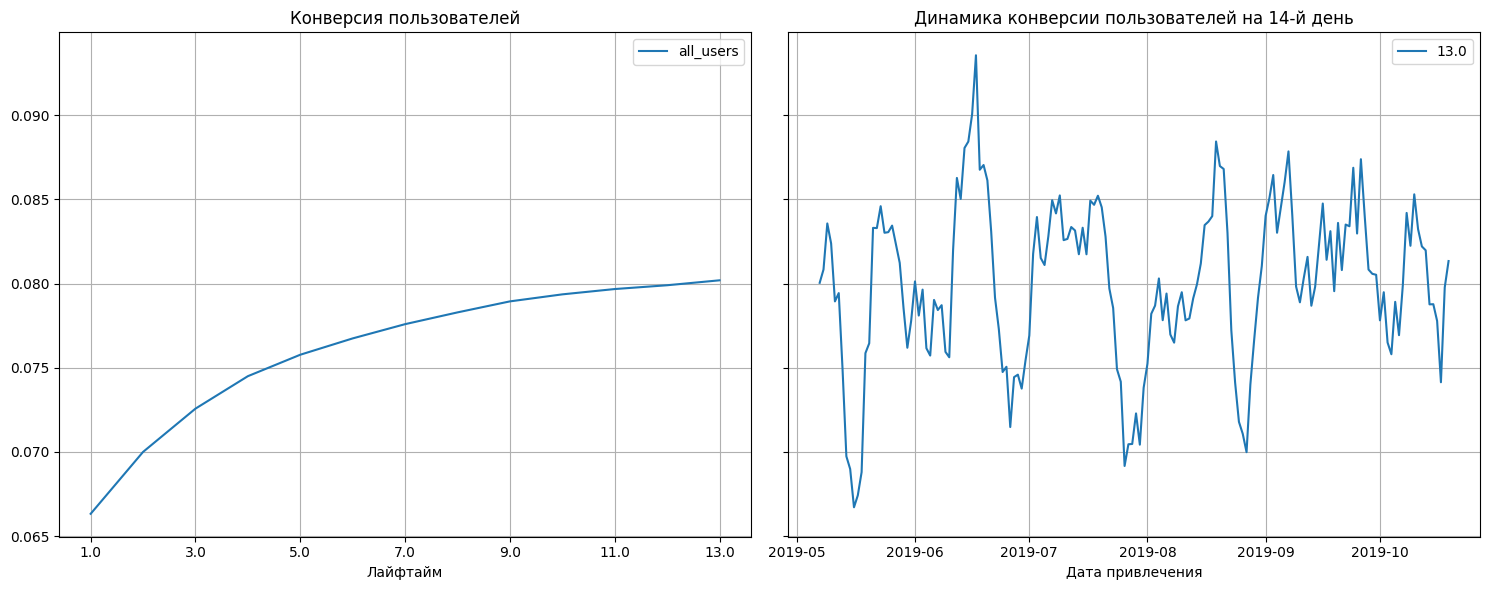

In [43]:
plot_conversion(conversion, conversion_in_time, horizon, window)

   
А теперь построим графики конверсии с разбивкой по каналам привлечения.

In [44]:
conversion_raw, conversion, conversion_in_time = get_conversion(orders, 
                                                                profiles_without_organic, 
                                                                observation_date, 
                                                                horizon, 
                                                                ['channel'])

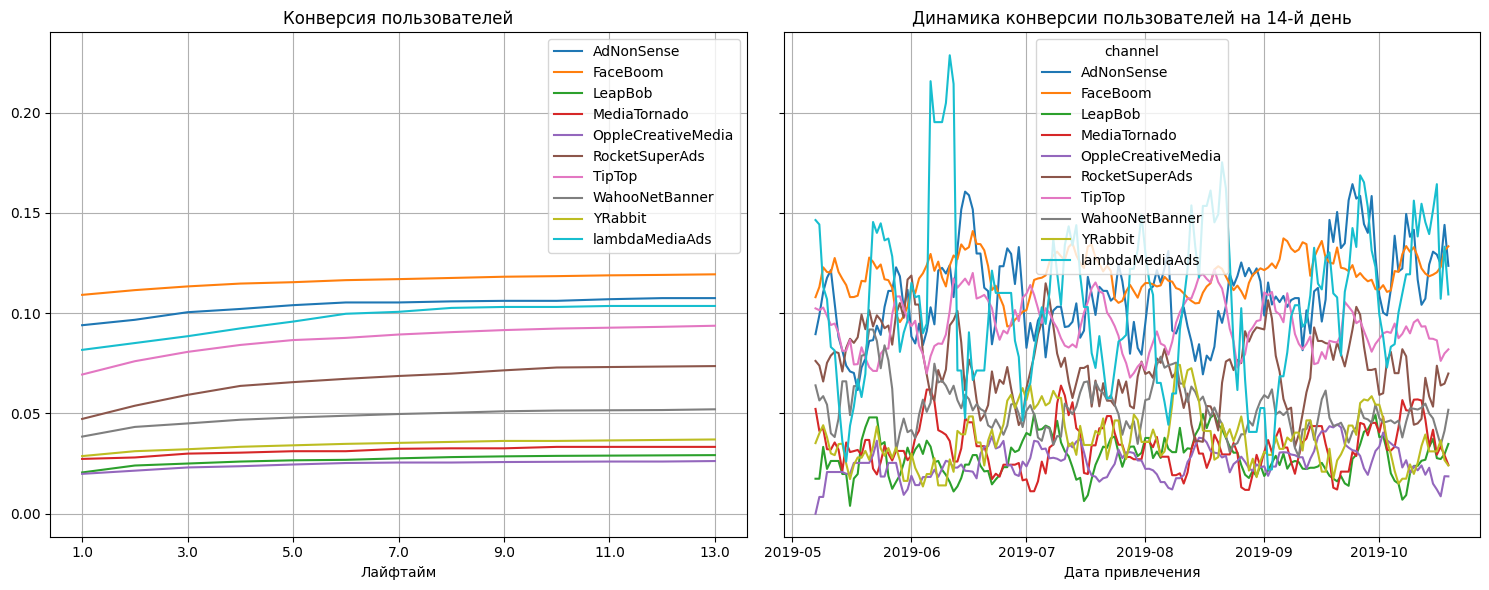

In [45]:
plot_conversion(conversion, conversion_in_time.fillna(0), horizon, window)

Выводы по графикам:
- конверсия увеличивается на протяжении лайфтайма, на 14й день в среднем достигает примерно 8% и дальше, скорее всего, практически не увеличивается;
- на протяжении всего всего рассматриваемого периода конверсия колеблется вокруг величины в 8%, не показывая ни устойчивого роста, ни падения;
- возможно точки падения и роста конверсии связаны по времени с релизом новых версий, но данные для проверки этой гипотезы отсутствуют;
- из графиков конверсии с разбивкой на рекламные каналы видно, что лучшая конверсия у пользователей, пришедших через FaceBoom – около 12%, близкая к этому конверсия у AdNonSense, lambdaMediaAds и TipTop, у пользователей, пришедших с остальных рекламных площадок конверсия ниже.

### Анализ удержания пользователей

In [46]:
retention_raw, retention, retention_in_time = get_retention(visits, profiles_without_organic, observation_date, horizon)

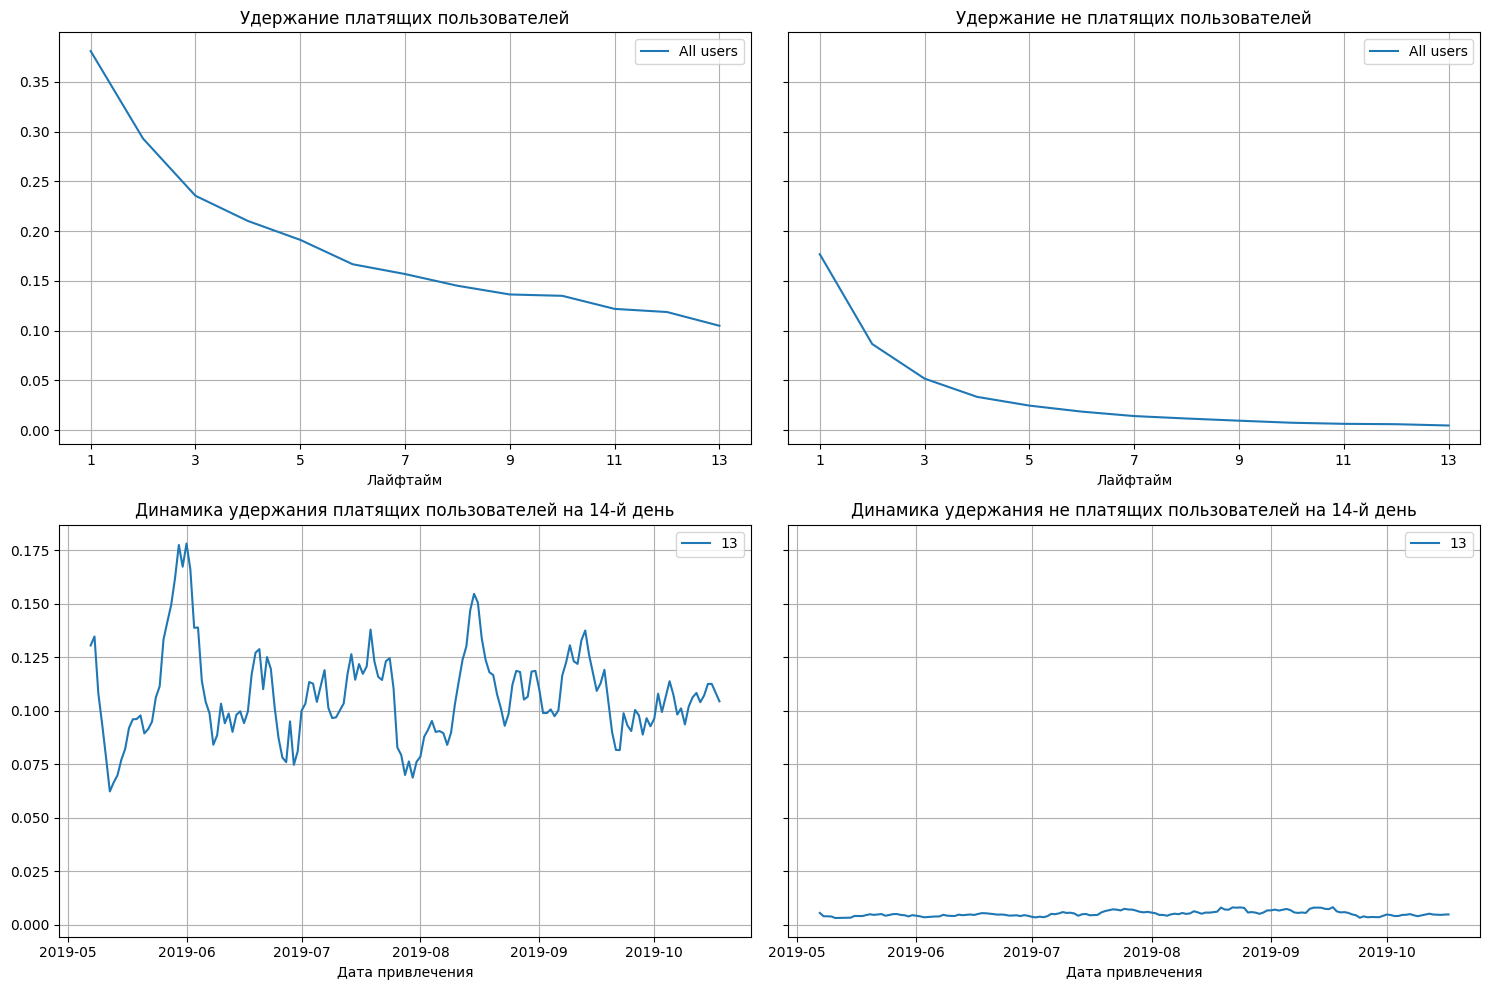

In [47]:
plot_retention(retention, retention_in_time, horizon, window)

Дополнительно построим графики удержания с разбивкой по рекламным каналам.

In [48]:
retention_raw, retention, retention_in_time = get_retention(visits, 
                                                            profiles_without_organic, 
                                                            observation_date, horizon, 
                                                            ['channel'])

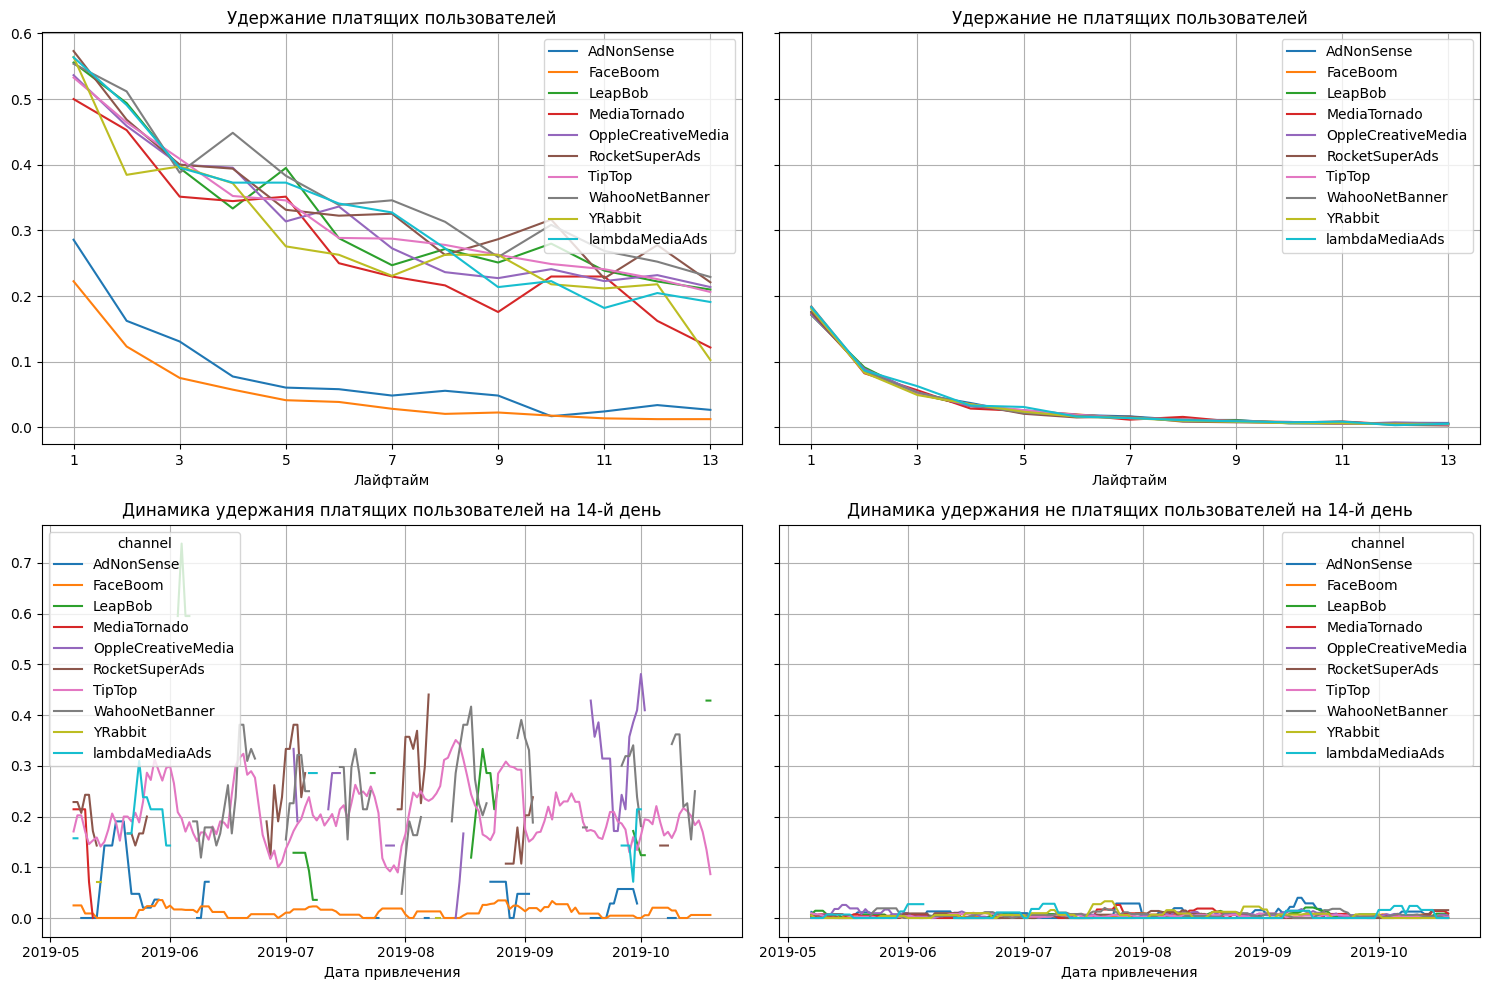

In [49]:
plot_retention(retention, retention_in_time.fillna(0), horizon, 7)

Выводы по графикам:
- из график удержания платящих пользователей видно, что на 14й день лайфтайма в приложении остаётся 10% всех платящих пользователей;
- график удержания не платящих пользователей значительно ниже удержания платящих и к 14му дню лайфтайма опускается практически до нуля, то есть неплатящие пользователи не задерживаются в приложении дольше двух недель;
- из графиков динамики удержания платящих и не платящих пользователей видно, что удержание 14го дня практически не меняется за рассматриваемый период;
- возможно колебания графика удержания 14го дня связаны с релизами новых версий приложения, но данных для проверки этой гипотезы отсутствуют;
- из графиков удержания с разбивкой на рекламные каналы видно, что FaceBoom и AdNonSense привлекают "некачественных" пользователей с удержанием практически равным удержанию не платящих пользователей.

### Анализ окупаемости рекламы по устройствам

Рассчитаем с разбивкой по устройствам LTV, ROI, их изменение в динамике для 14го дня, динамику изменения CAC и построим их графики.

In [50]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(orders, profiles_without_organic, observation_date, horizon, ['device'])

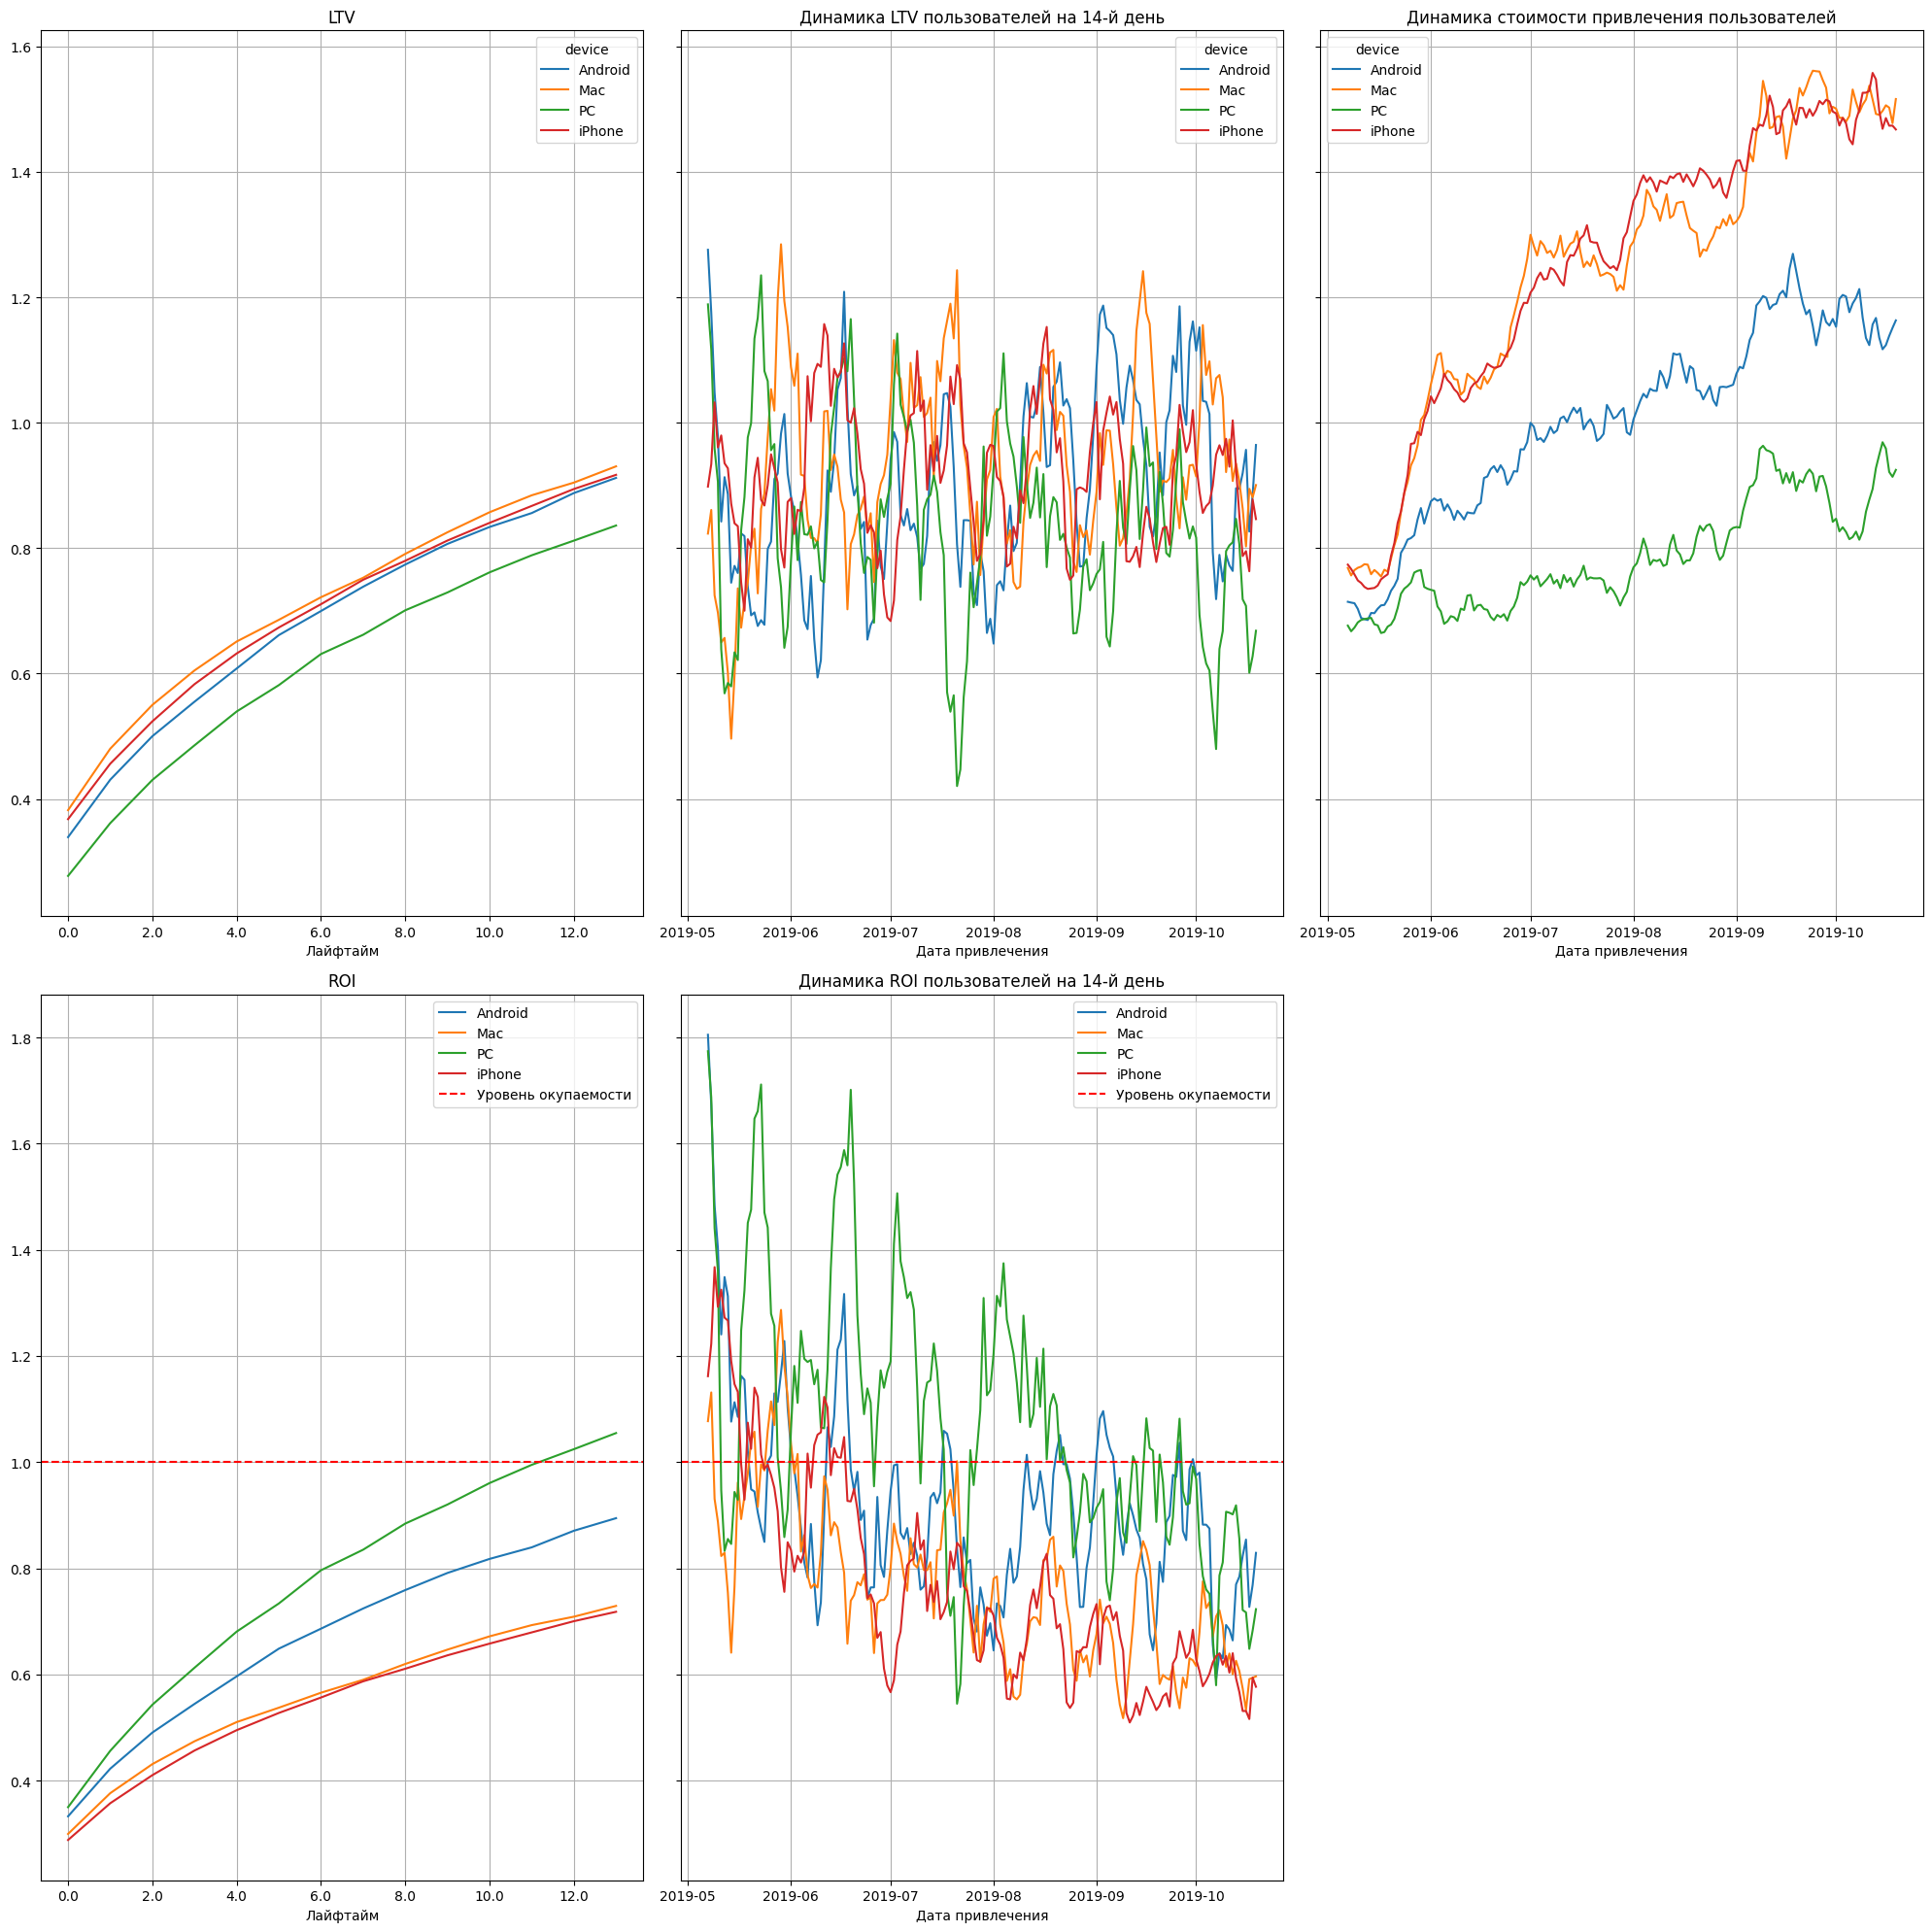

In [51]:
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon, window)

Выводы по графикам:
- графики LTV показывает, что пользователи, пользующиеся айфоном, маками и андроидом приносят за 14 дней пребывания в приложении примерно одинаковую прибыль – примерно 0.9 доллара на пользователя, а вот пользователи ПК меньше – примерно 0.82 доллара на пользователя;
- графики динамики LTV на 14й день показывает, что за рассматриваемый период происходит колебание величины LTV для всех устройств вокруг своих величин без устойчивого падения или роста;
- на графике стоимости привлечения пользователей виден рост CAC за рассматриваемый период для всех устройств с изначальных 0.75 доллара за пользователя, примерно одинаковых для всех устройств, до 1.5 доллара за пользователя для маков и айфонов, до 1.15 долларов за пользователя для андроида и до 0.9 доллара за пользователя для ПК;
- на графике ROI отчётливо видно, что окупается только привлечение пользователей ПК, а вот привлечение пользователей других устройств – нет;
- по динамике ROI видно, что привлечение пользователей андроид-устройства, айфонов и маков перестало себя окупать в июне, окупаемость привлечения пользователей ПК при этом тоже падает.

Таким образом оказывать негативное влияние на окупаемость рекламы может закупка рекламы на айфонах и маках из-за высокой стоимости привлечения пользователей, пользующихся этими устройствами.

### Анализ окупаемости рекламы по странам

Рассчитаем с разбивкой по странам LTV, ROI, их изменение в динамике для 14го дня, динамику изменения CAC и построим их графики.

In [52]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(orders, profiles_without_organic, observation_date, horizon, ['region'])

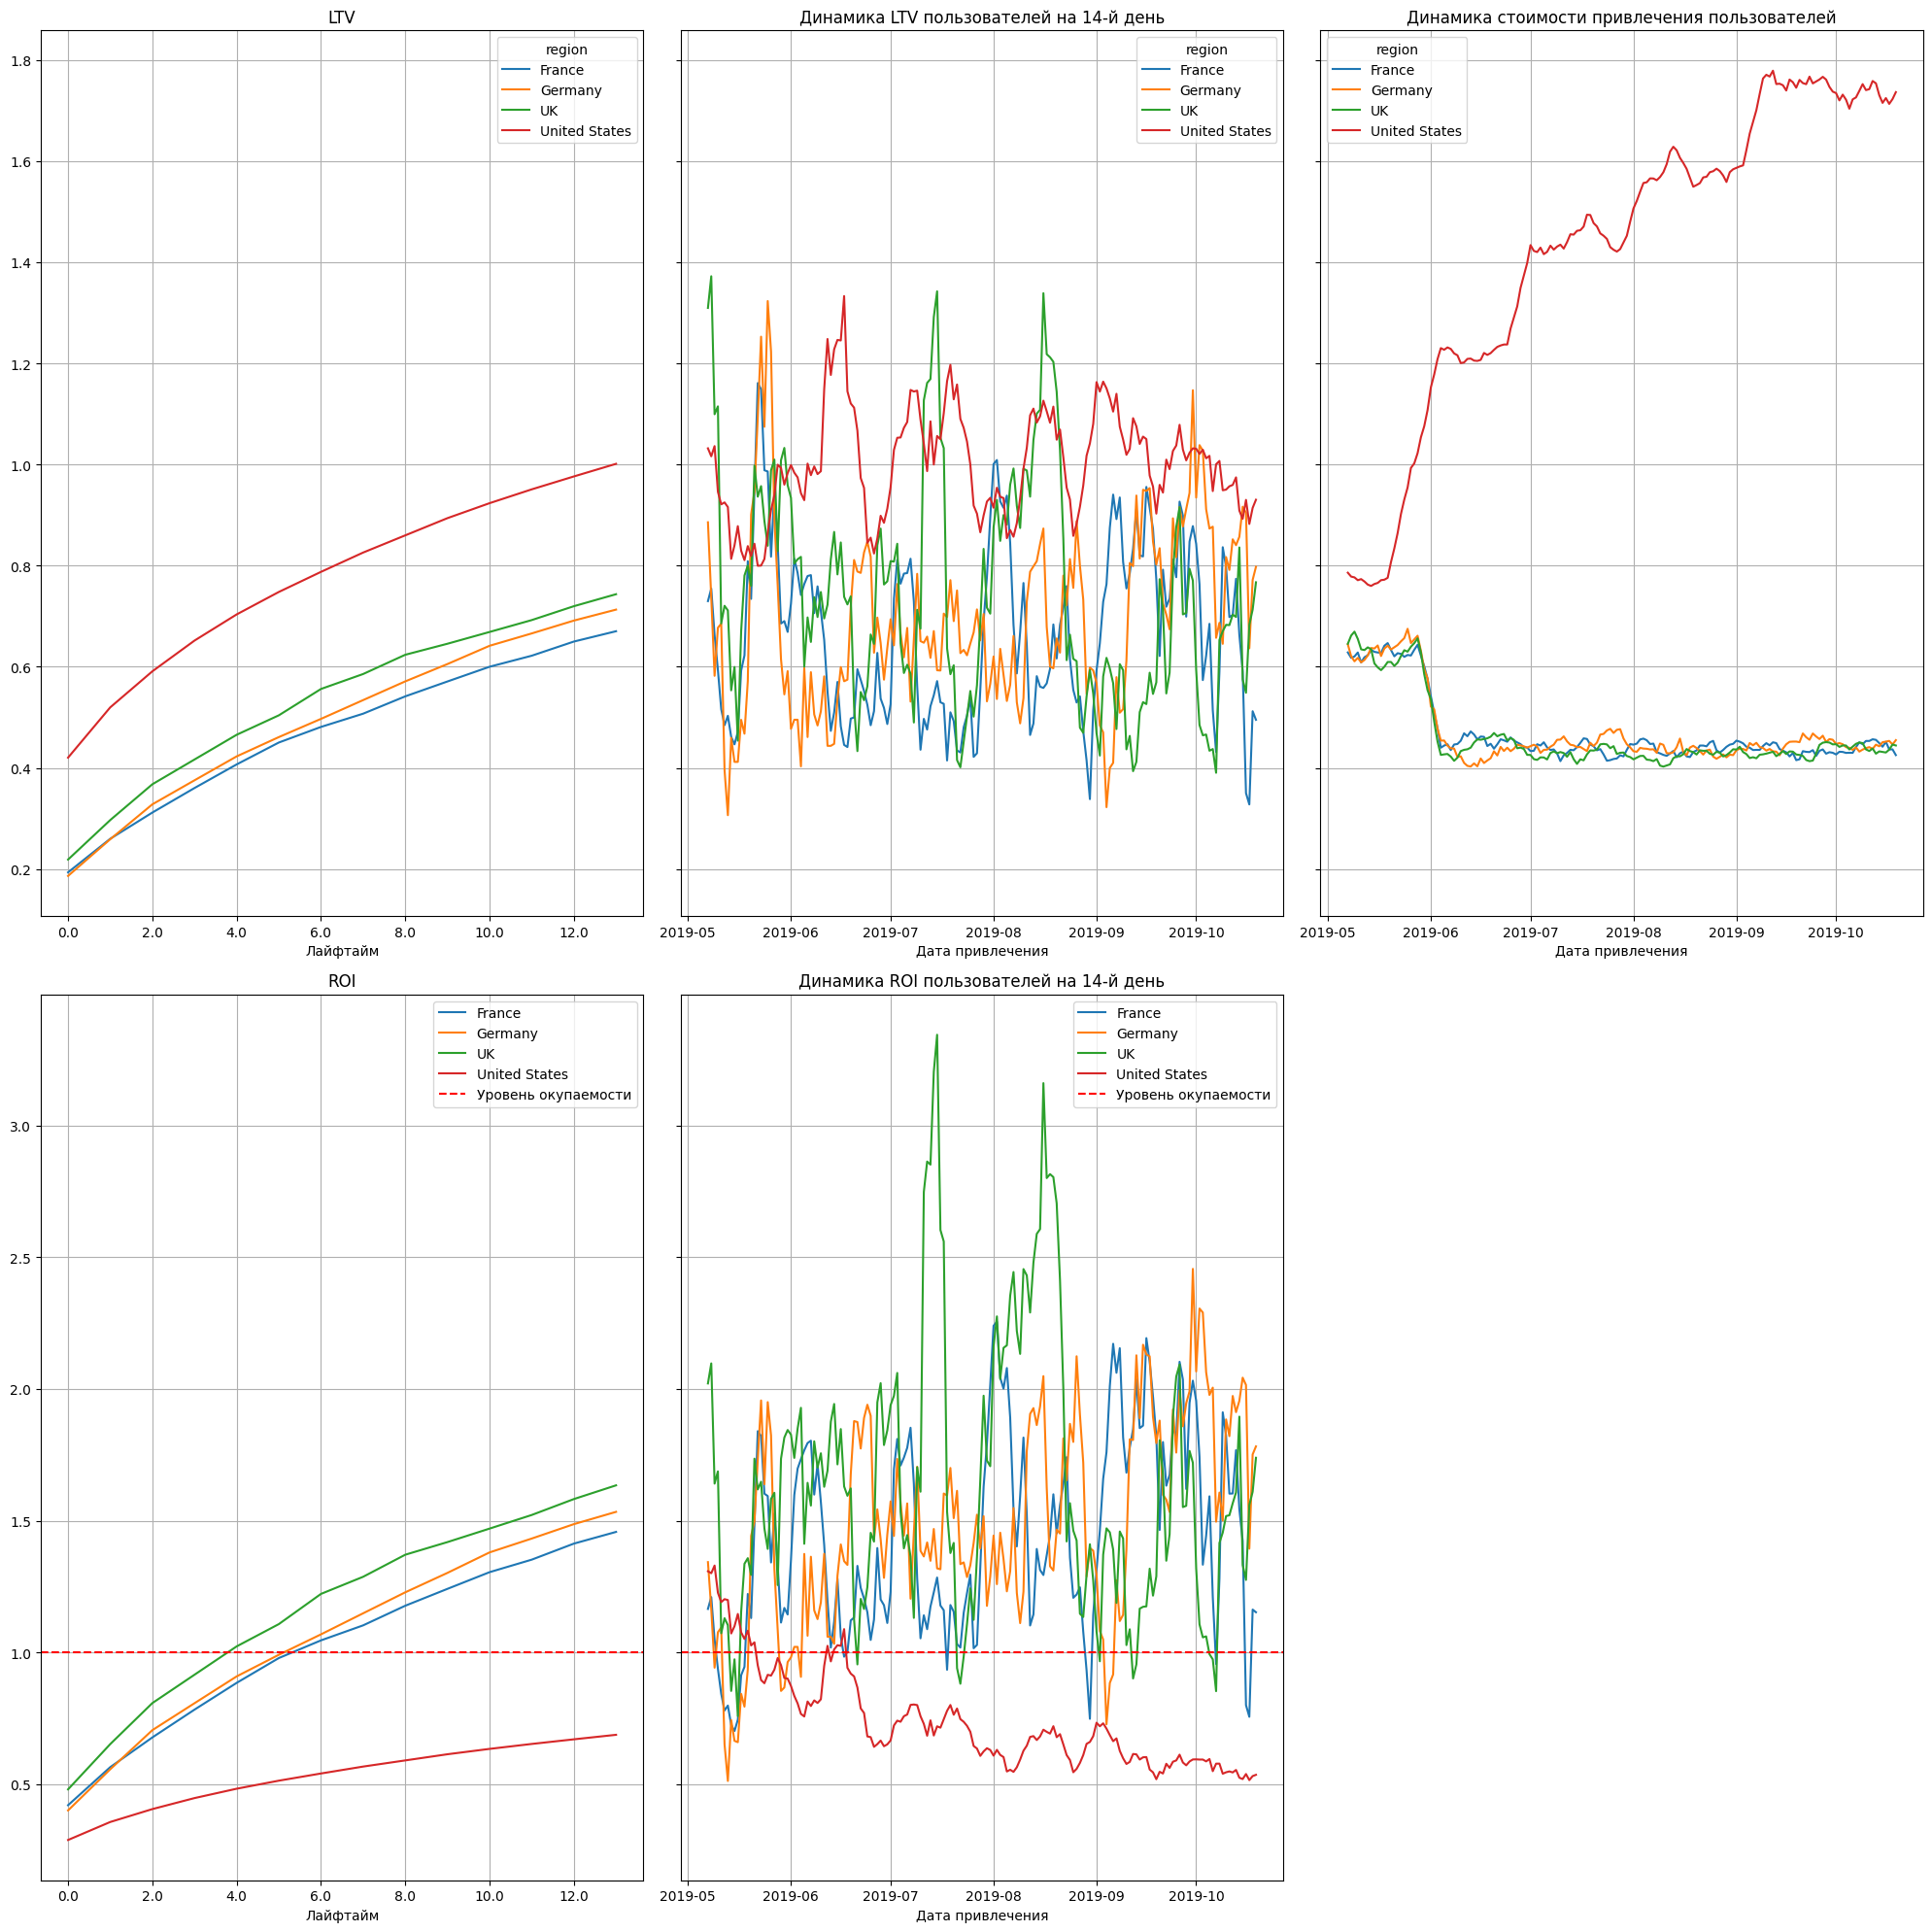

In [53]:
plot_ltv_roi(ltv, ltv_in_time.fillna(0), roi, roi_in_time.fillna(0), horizon, 7)

Выводы по графикам:
- графики LTV показывает, что пользователи из США приносят больше всего прибыли – примерно по 1 доллару с пользователя, пользователи из остальных стран меньше – 0.7-0.85 доллара с пользователя;
- графики динамики LTV на 14й день показывает, что за рассматриваемый период происходит колебание величины LTV для регионов вокруг своих величин без устойчивого падения или роста;
- на графике стоимости привлечения пользователей виден значительный рост CAC за рассматриваемый период для пользователей из США – с примерно 0.8 доллара за пользователя до примерно 1.7 доллара за пользователя, при этом для всех остальных регионов стоимость привлечения снизилась – примерно с 0.6 до 0.4 долларов за пользователя;
- на графике ROI отчётливо видно, что привлечение пользователей из США не окупается, в отличае от пользователей из других стран, которые тратят в приложение в среднем на 50% больше, чем стоит их привлечение;
- по динамике ROI видно, что привлечение пользователей из США перестало себя окупать в ещё в мае, окупаемость привлечения пользователей из других стран при этом колеблется в широком диапазоне, но не показывает ни устойчивого роста, ни падения.

Таким образом оказывать негативное влияние на окупаемость рекламы может закупка пользователей из США из-за их высокой стоимости.

### Анализ окупаемости рекламы по рекламным каналам

Рассчитаем с разбивкой по рекламным каналам LTV, ROI, их изменение в динамике для 14го дня, динамику изменения CAC и построим их графики.

In [54]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(orders, 
                                                      profiles_without_organic, 
                                                      observation_date, horizon, ['channel'])

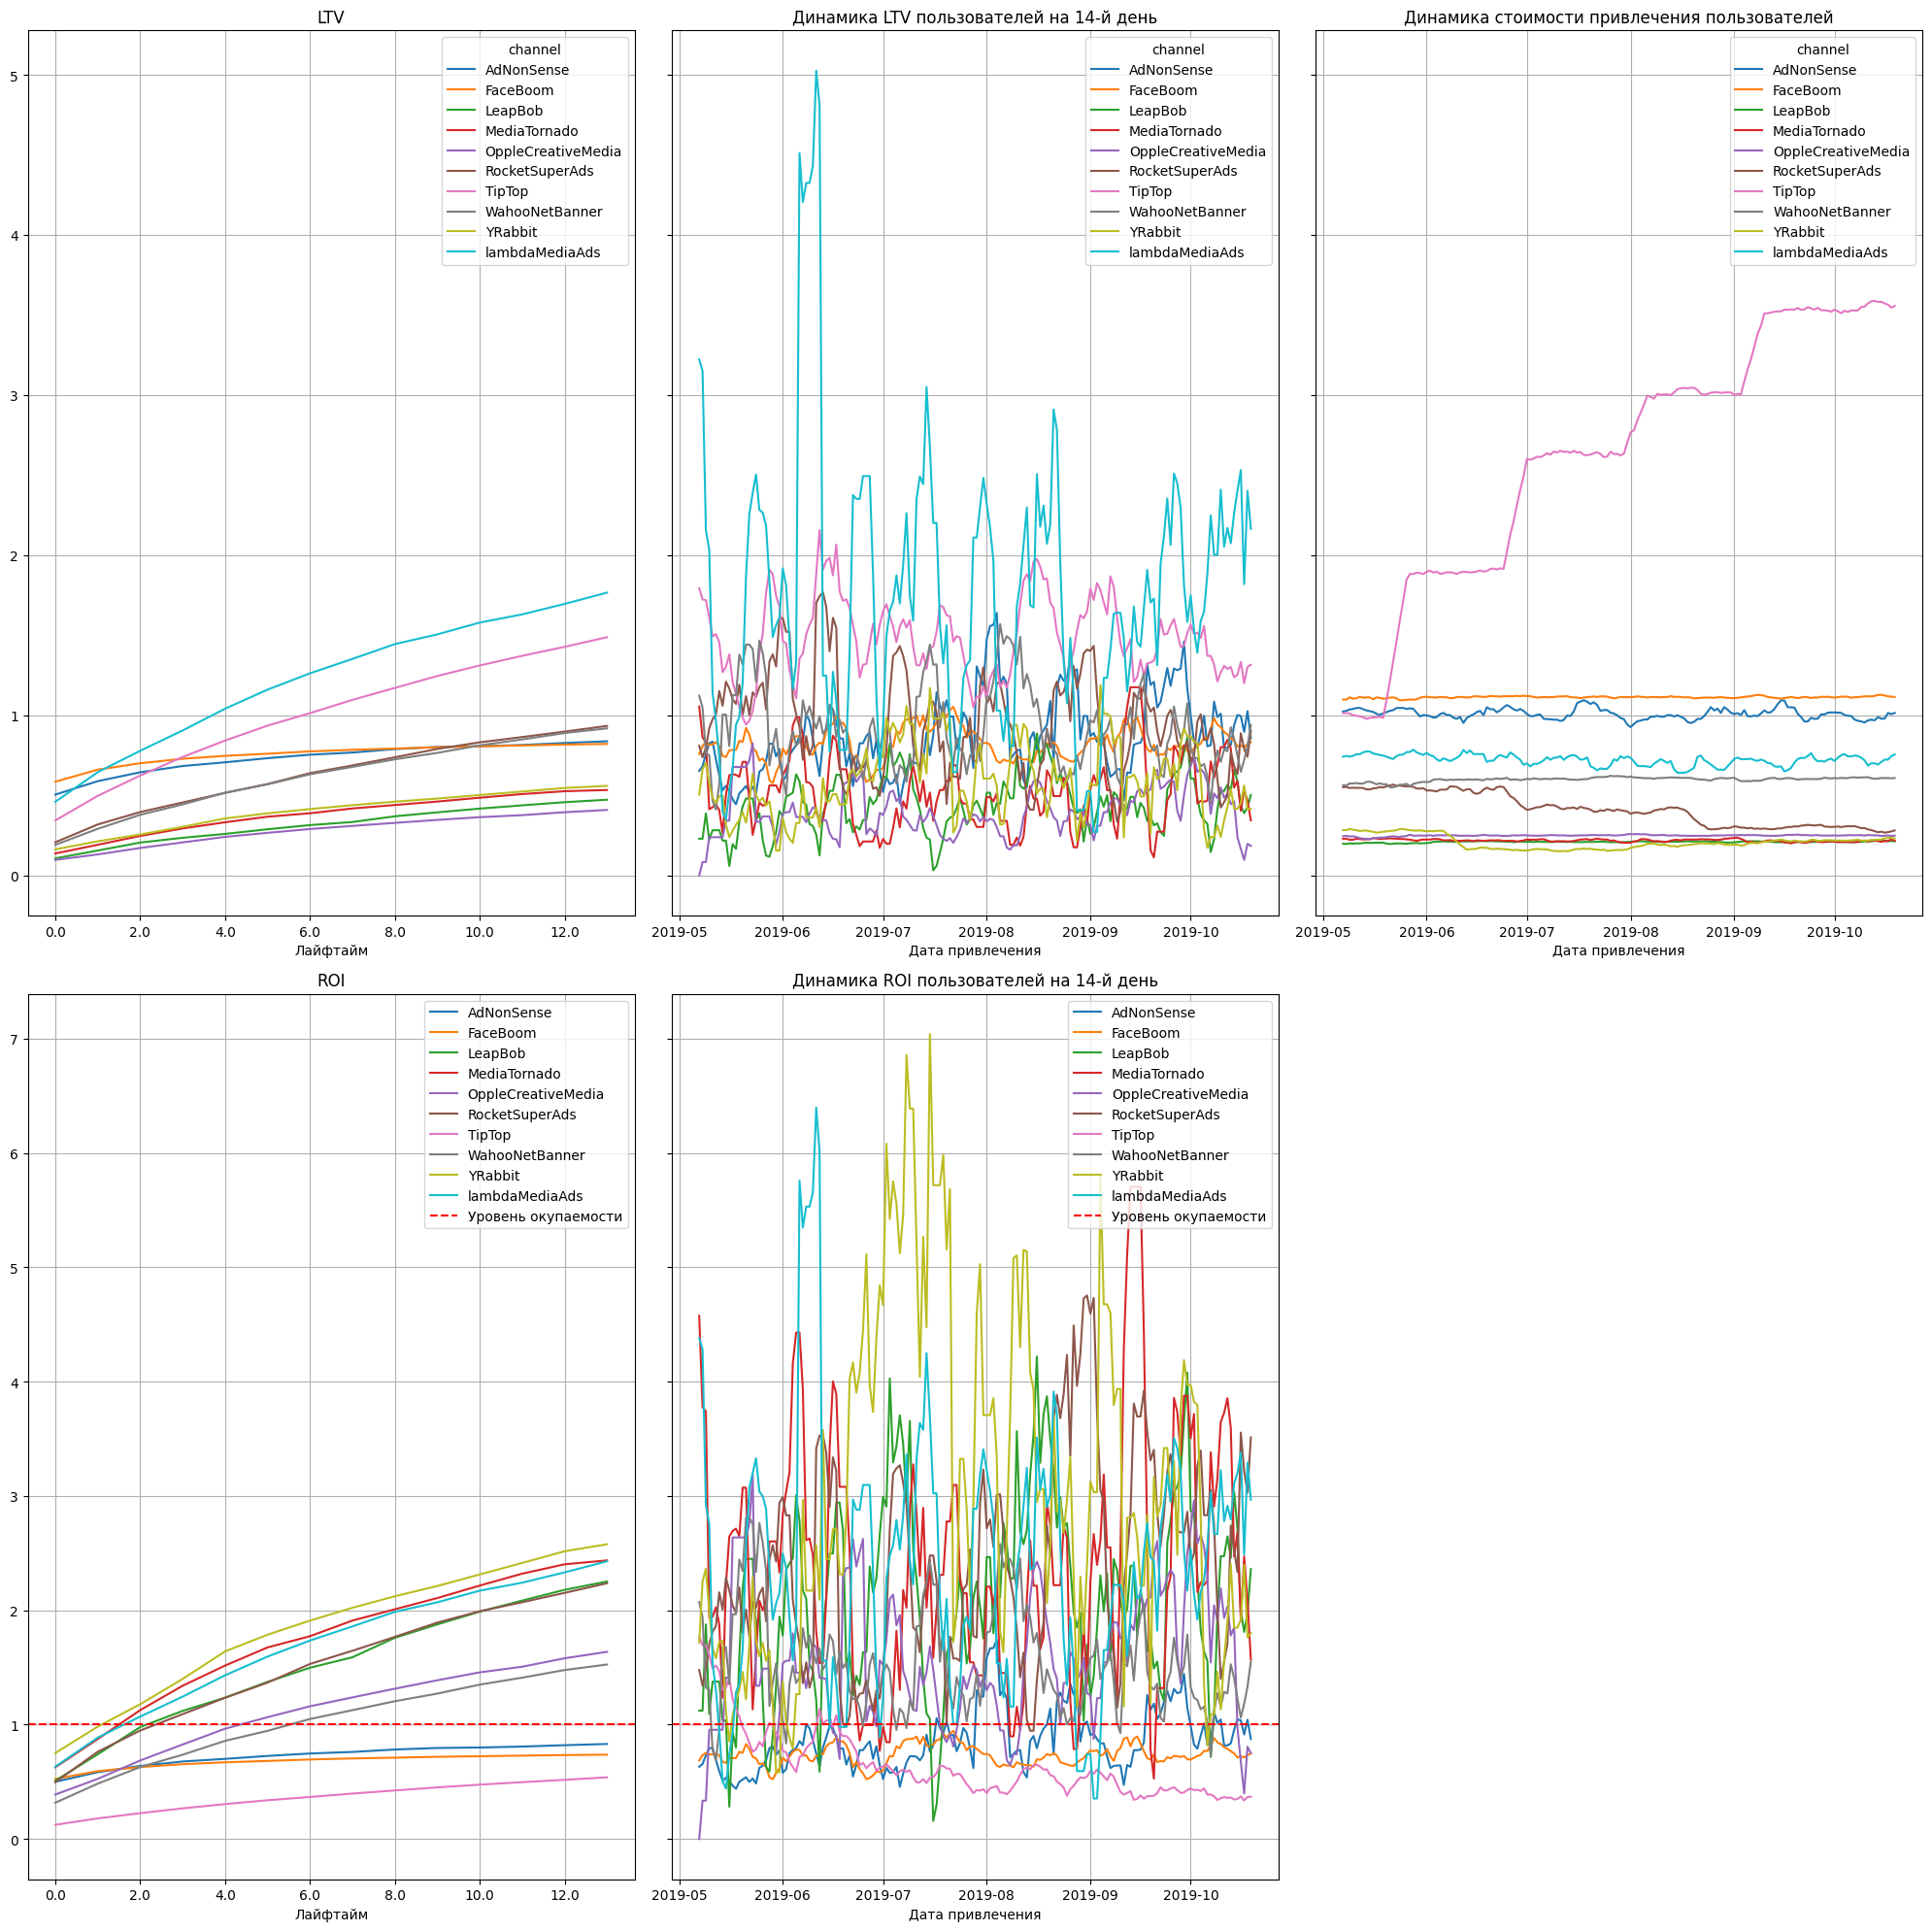

In [55]:
plot_ltv_roi(ltv, ltv_in_time.fillna(0), roi, roi_in_time.fillna(0), horizon, 7)

Выводы по графикам:
- графики LTV показывает, что за 14 дней "жизни" в приложении больше всего прибыли приносят пользователи привлечённые через lambdaMediaAds – примерно 1.75 доллара на пользователя, далее идёт TipTop – 1.5 доллара с пользователя, когорта FaceBoom, AdNonSense, RocketSuperAds и  WahooNetBanner приносит примерно по 0.75-0.9 доллара с пользователя, пользователи из остальных источников – меньше 0.6 доллара с пользователя;
- на графике динамики LTV на 14й день видно, что для всех рекламных каналов характерно колебание вокруг какого-то устойчивого значения LTV без устойчивого роста или падения;
- на графике динамики CAC сразу бросается в глаза рост стоимости привлечения одного пользователя в TipTop в 3.5 раза за рассматриваемый период, при CAC для других каналов практически не изменяется, при этом второе и третье место по стоимости привлечения клиентов занимают FaceBoom и AdNonSense;
- на графике ROI видно, что реклама в AdNonSense, FaceBoom и TipTop не окупается за 14 дней;
- окупается реклама в YRabbit – более чем на 250%, в MediaTornado и lambdaMediaAds – примерно на 240%, в LeeapBob и RocketSuperAds – примерно на 220%, в OppelCreativeMedia и WahooNetBanner – примерно на 150%;
- на графике динамики ROI видно, что реклама в TipTop окупалась до середины мая, а потом перестала, реклама в FaceBoom не окупалась вообще, реклама в AdNonSense тоже большую часть времени не окупалась, для остальных рекламных каналов в течении рассматриваемого периода происходит достаточно резкие скачки окупаемости, что, скорее всего, связано с отсутствием стабильного потока пользователей, привлекаемых через эти каналы.

Таким образом оказывать негативное влияние на окупаемость рекламы может покупка рекламы:
- у TipTop из-за высокой стоимости привлечения пользователей, не смотря на высокий LTV этих пользователей;
- у FaceBoom и AdNonSense из-за сравнительно низкого LTV пользователей, приходящих через эти каналы при сравнительно высоком CAC этих каналов.

Дополнительно рассмотрим окупаемость рекламы по странам и устройствам, исключив из данных рекламу в TipTop и FaceBoom.

### Анализ окупаемости рекламы по странам c исключением рекламы в TipTop и FaceBoom

In [56]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(orders, 
                                                      profiles_without_organic
                                                      .query('(channel != "TipTop") and (channel != "FaceBoom")'), 
                                                      observation_date, horizon, ['region'])

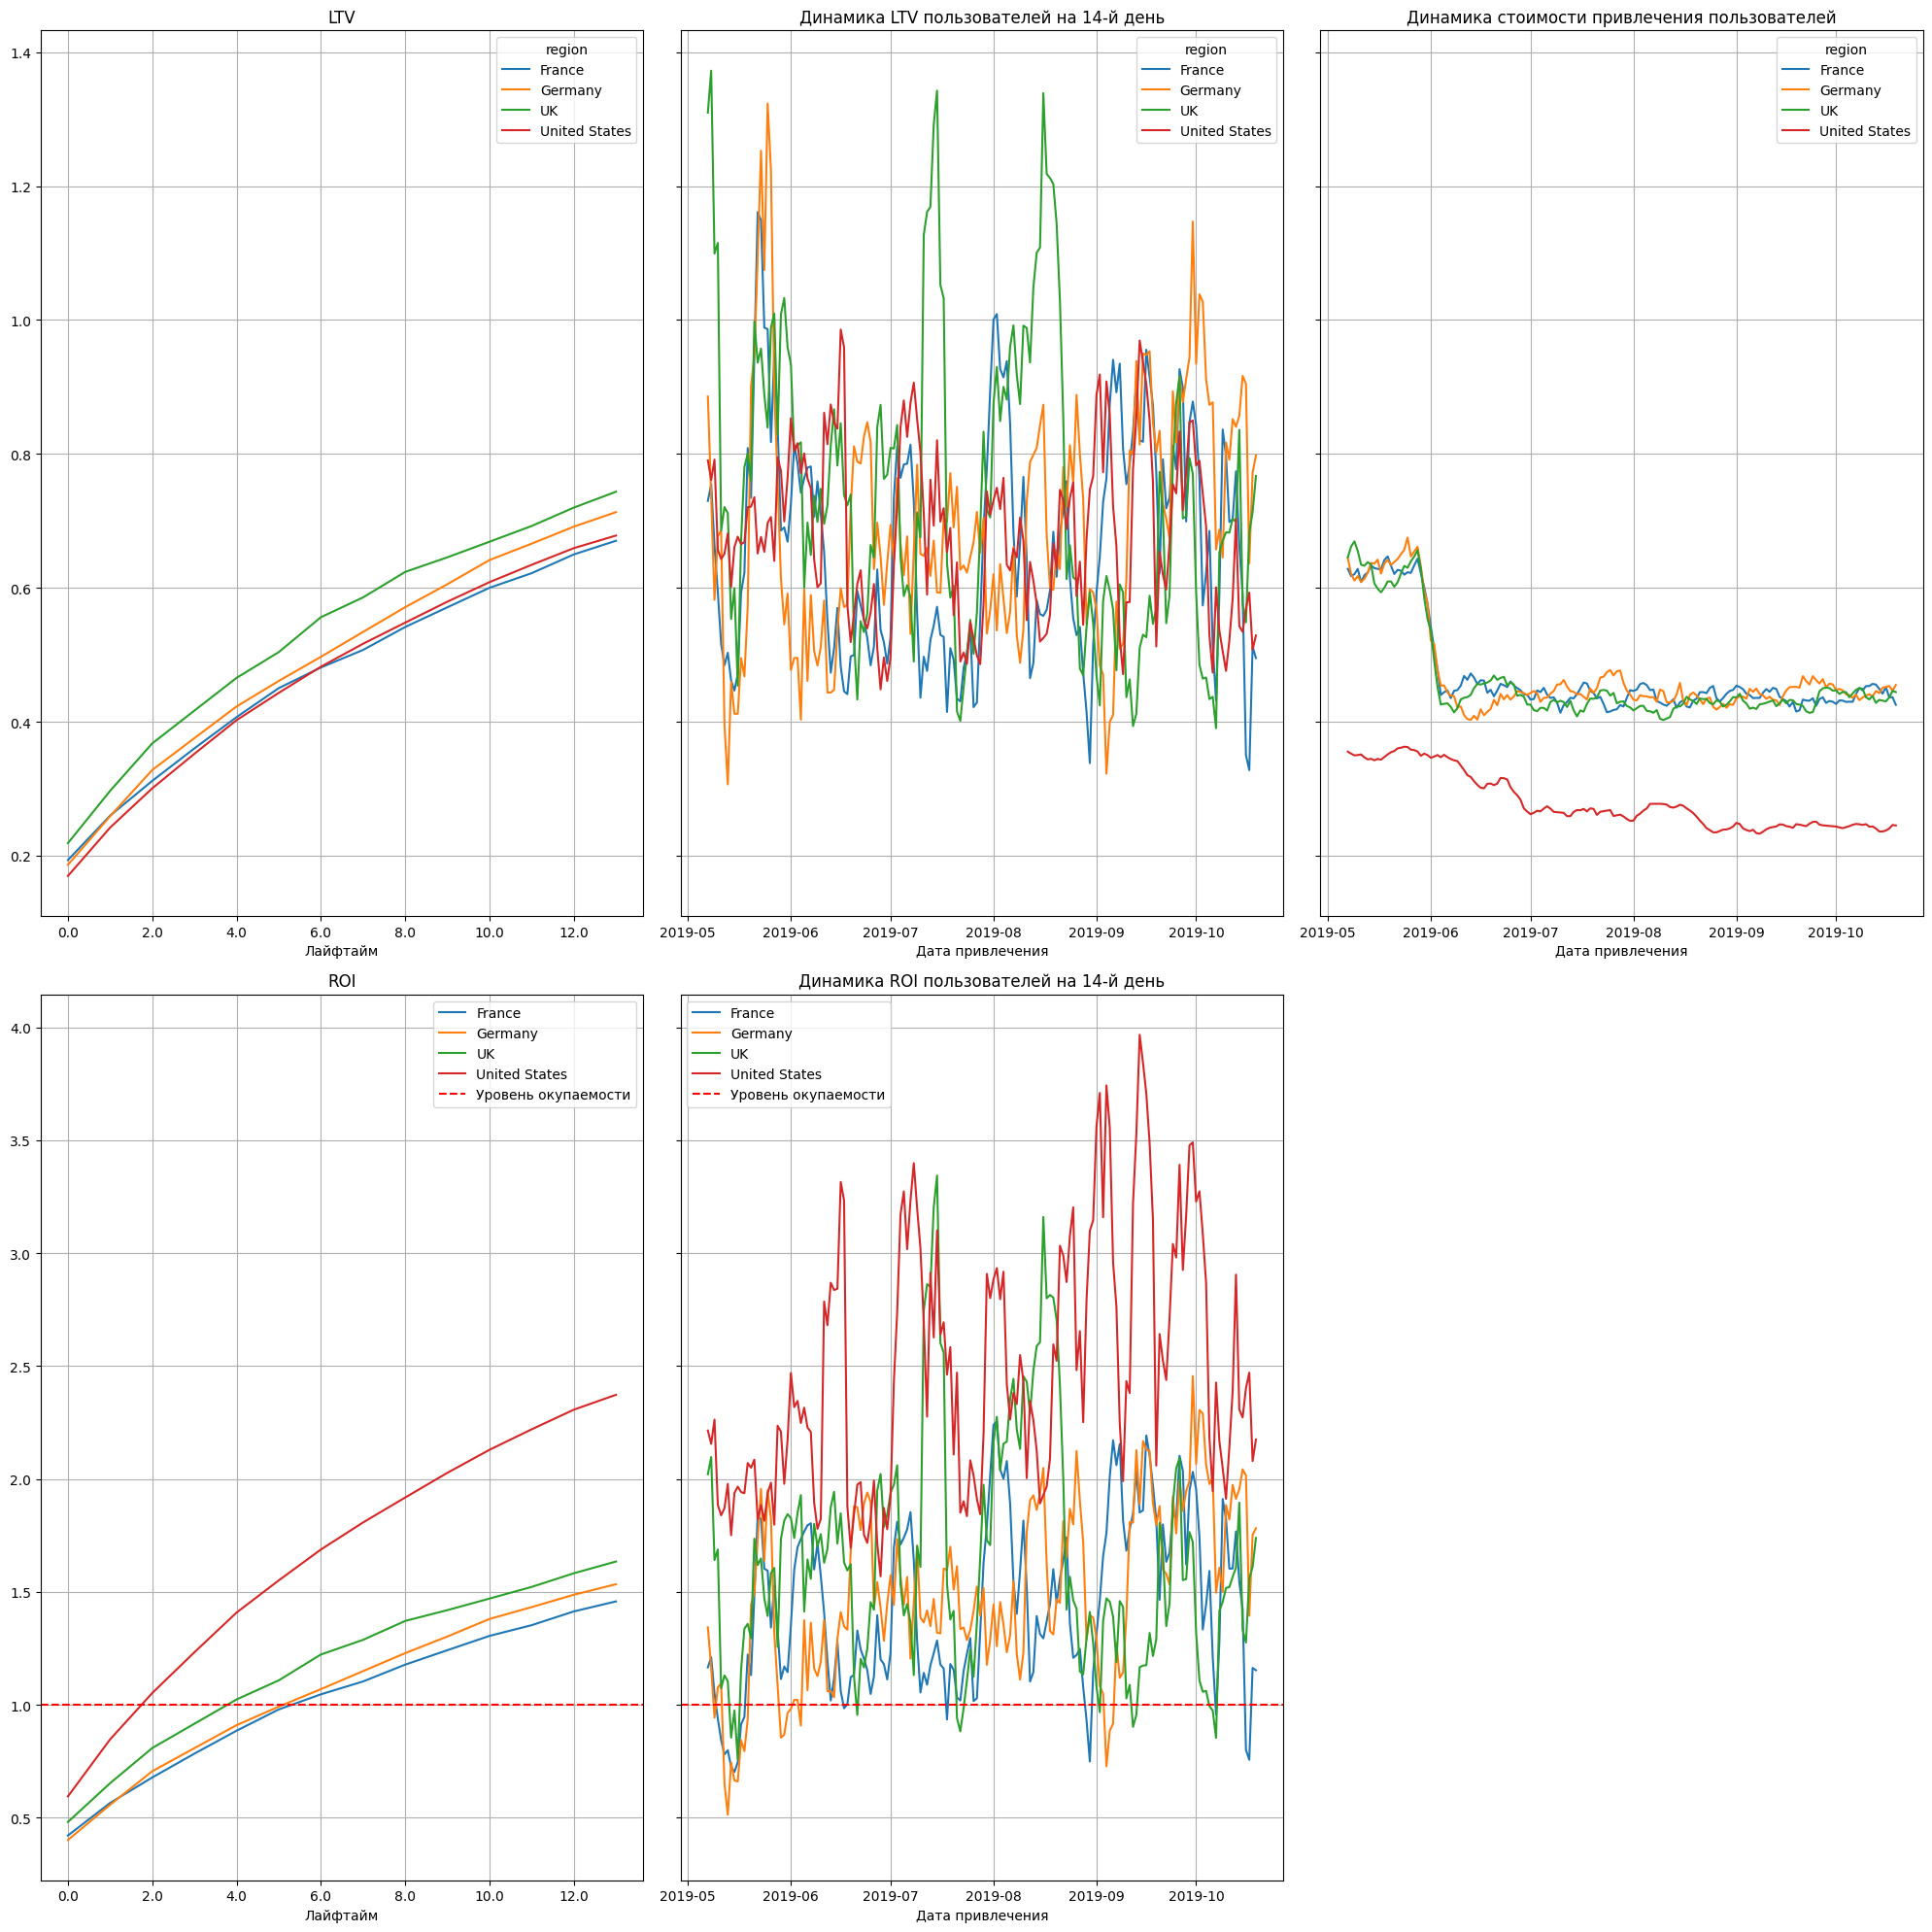

In [57]:
plot_ltv_roi(ltv, ltv_in_time.fillna(0), roi, roi_in_time.fillna(0), horizon, window)

Из графиков видно, что при исключении из данных пользователей, привлечённых через TipTop и FaceBoom, реклама окупается во всех странах.

### Анализ окупаемости рекламы по устройствам c исключением рекламы в TipTop и  FaceBoom

In [58]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(orders, 
                                                      profiles_without_organic
                                                      .query('(channel != "TipTop") and (channel != "FaceBoom")'), 
                                                      observation_date, horizon, ['device'])

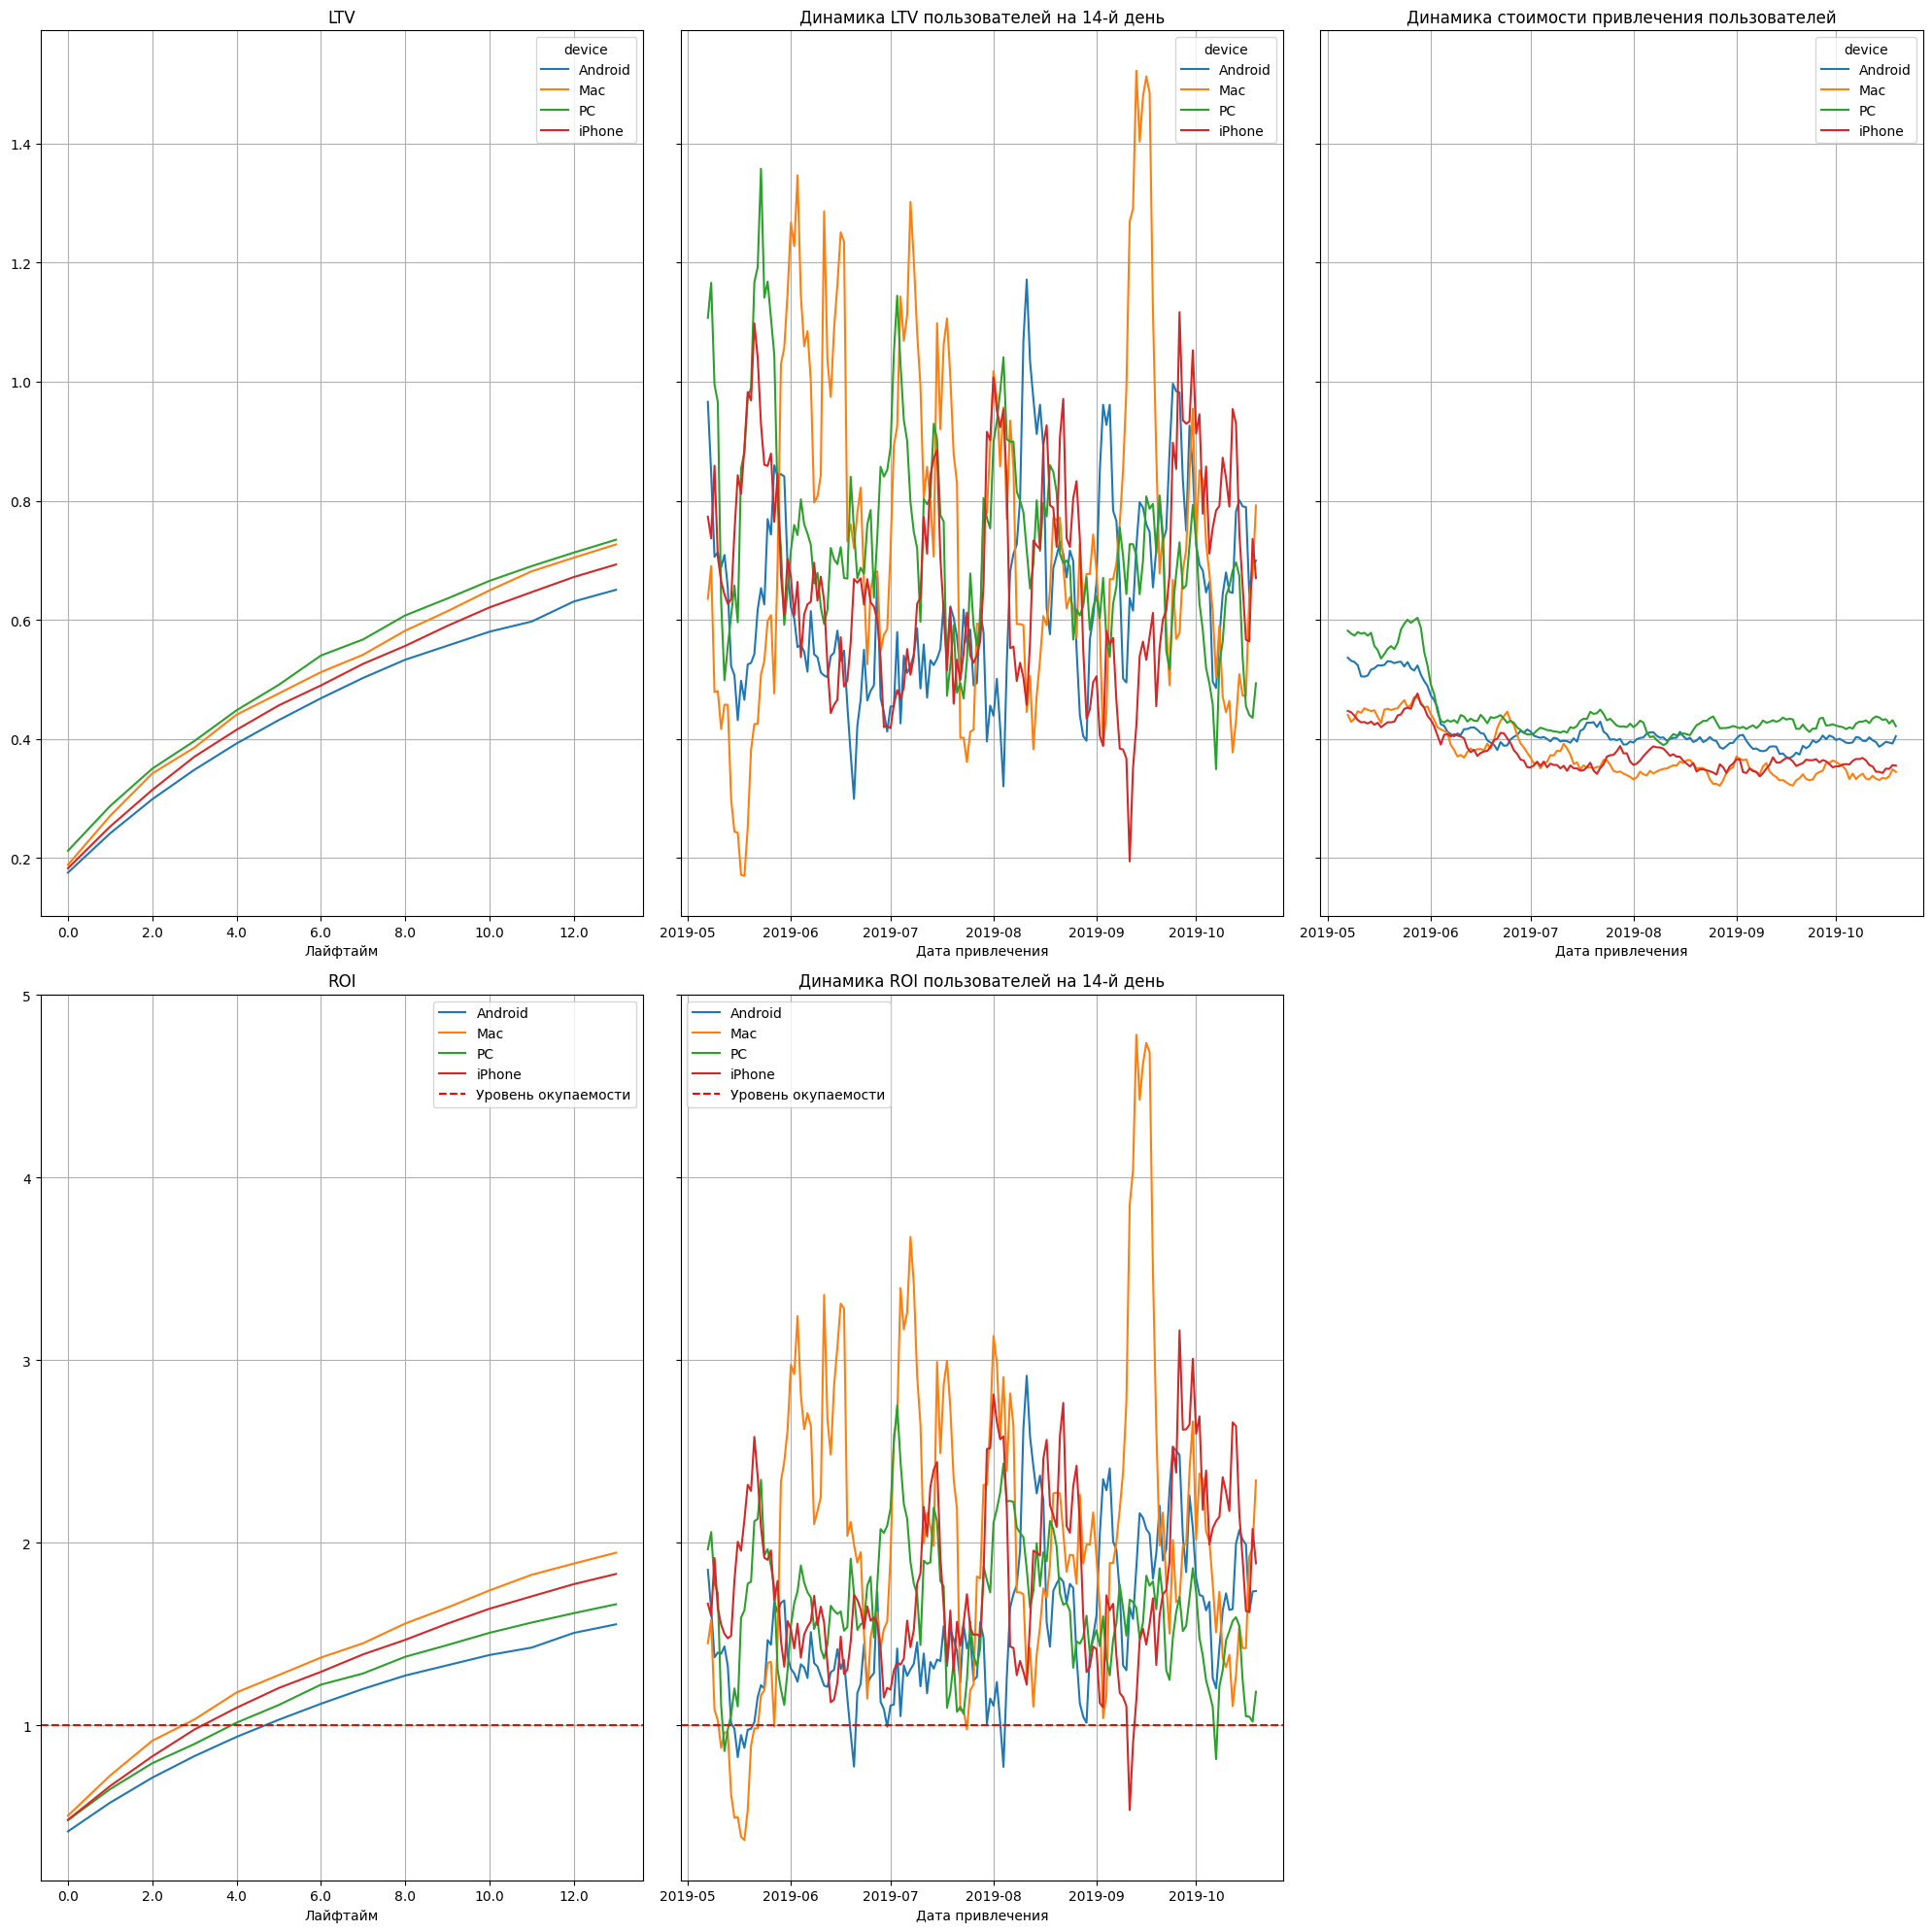

In [59]:
plot_ltv_roi(ltv, ltv_in_time.fillna(0), roi, roi_in_time.fillna(0), horizon, window)

Из графиков видно, что при исключении из данных пользователей, привлечённых через TipTop и FaceBoom, реклама окупается на всех устройствах.

### Выводы по разделу

По окупаемости рекламы можно сделать следующие выводы:
- затраты на привлечения пользователей за рассматриваемый период не окупились, поскольку LTV колебался вокруг примерно 0.7 доллара на пользователя, а стоимость привлечения одного пользователя на протяжении всего рассматриваемого периода выросла с чуть более 0.3 долларов за пользователя до 0.85 долларов за пользователя;
- конверсия увеличивается на протяжении лайфтайма, на 14й день в среднем достигает примерно 5.7% и дальше не меняется, в динамике также видно, что величина конверсии на протяжении большей части рассматриваемого периода колеблется вокруг величины 6%;
- удержание на 14й день платящих пользователей – 12%, для не платящих опускается практически до нуля, в динамике эти величины практически не меняются за рассматриваемый период;
- анализ окупаемости рекламы для разных устройств показал, что реклама не окупается на айфонах и маках, для андроид-устройств и ПК реклама окупается, причина в том, что стоимость привлечения пользователей за рассматриваемый период выросла примерно в два раза для ПК и андроид-устройств и более чем в три раза для айфонов и маков;
- анализ окупаемости рекламы в разных странах показал, что, несмотря на самый высокий LTV, не окупается реклама в США, реклама в Великобритании, Германии и Франции окупается, причина здесь также в росте стоимости привлечения пользователей из США примерно в три раза, при практически неизменной стоимости привлечения пользователей из других стран;
- анализ окупаемости рекламы по разным рекламным каналам показал, что не окупается реклама в TipTop из-за высокой стоимости привлечения пользователей (за рассматриваемый период выросла в 3.5 раза), не смотря на высокий LTV этих пользователей, и в FaceBoom и AdNonSense из-за сравнительно низкого LTV пользователей, приходящих через эти каналы при сравнительно высоком CAC этих каналов;
- окупается реклама в YRabbit – более чем на 250%, в MediaTornado и lambdaMediaAds – примерно на 240%, в LeeapBob и RocketSuperAds – примерно на 220%, в OppelCreativeMedia и WahooNetBanner – примерно на 150%;
- дополнительный анализ показывает, что при исключении пользователей, привлечённых через TipTop, реклама окупается во всех странах и на всех устройствах, таким образом в первую очередь нужно вносить изменения в структуру закупки рекламы у рекламных площадок, а не в разных странах или на разных устройствах;
- реклама в TipTop за рассматриваемый период стала необоснованно доогой и не окупает себя;
- пользователи, которые приходят из FaceBoom и AdNonSense, хоть и имеют сравнительно высокую конверсию, но имеют удержание на уровне органических пользователей, что снижает LTV таких пользователей.

Промежуточные рекомендации для рекламного отдела:
- необходимо проанализировать стоимость привлечения пользователей через TipTop и выяснить почему за рассматриваемый период так сильно увеличилась CAC и сократить расходы для этой площадки;
- необходимо также проанализировать стоимость привлечения через FaceBoom и AdNonSense и пересмотреть рекламные материалы для этих площадок, чтобы привлекать более платящих пользователей, либо снизить расходы на рекламу на этих площадках;
- необходимо рассмотреть возможность покупки дополнительной рекламы у следующих площадок: в первую очередь у YRabbit, MediaTornado, lambdaMediaAds, LeeapBob и RocketSuperAds, во вторую очередь у OppelCreativeMedia и WahooNetBanner.

## Общие выводы

Сформулируем общие выводы:

- в полученных данных отсутствую пропуски и дубликаты;
- всего привлечено за рассматриваемый период привлечено 150008 уникальных пользователей;
- общие затраты на маркетинг в рассматриваемый период составили 105497 долларов;
- в среднем самая дорогая реклама в TipTop – 2.8 доллара за пользователя, а самая дешёвая в LeapBob – 0.21 доллара за пользователя;
- не смотря на дороговизну рекламы в TipTop на протяжении всего рассматриваемого периода наблюдалось увеличение затрат на рекламу на этой площадке;
- из Франции, Германии и Великобритании привлечено по 10-12% пользователей, расходы на рекламу в этих странах окупаются;
- также окупаются расходы на рекламу на андроид-устройствах и ПК, на которые приходится 23% и 20% новых пользователей соответственно;
- новых пользователей из США 66%, пользователей пользующихся айфонами и маками – 36% и 20% соответственно, реклама для пользователей всех этих кагорт не окупается, но дело не в стране или устройстве, а в площадках, через которые приходят эти пользователи;
- не считая органических пользователей, которых 37%, больше всего пользователей приходят через FaceBoom – более 19% и TipTop – 13%, но реклама на этих площадках приносит убытки, также как и реклама в AdNonSense;
- причина неокупаемости рекламы в TipTop в том числе в росте стоимости привлечения пользователей через эту сеть в 3.5 раза за рассматриваемый период, причина неокупаемости рекламы в FaceBoom и AdNonSense в том, что они привлекают недостаточно платящих пользователей;
- затраты на привлечения пользователей за рассматриваемый период не окупились из-за необоснованного увеличение закупки рекламы в TipTop, при росте цен на рекламу.

Рекомендации для отдела маркетинга:
- анализировать не только LTV пользователей привлечённых из различных источников, но и ROI;
- проводить подобного рода анализ регулярно, желательно каждую неделю;
- стоит рассмотреть возможность изменения рекламных материалов с целью привлечения более "качественных" пользователей, которые будут лучше удерживаться и конвертироваться в покупающих, для более точных рекомендаций необходим сравнительный анализ рынка, который покажет на сколько Procrastinate Pro+ отстаёт по этим показателям от конкурентов;
- необходимо проанализировать стоимость привлечения пользователей через TipTop и выяснить почему за рассматриваемый период так сильно увеличилась CAC и сократить расходы для этой площадки;
- необходимо также проанализировать стоимость привлечения через FaceBoom и AdNonSense и пересмотреть рекламные материалы для этих площадок, чтобы привлекать более платящих пользователей, либо снизить расходы на рекламу на этих площадках;
- необходимо рассмотреть возможность покупки дополнительной рекламы у следующих площадок: в первую очередь у YRabbit, MediaTornado, lambdaMediaAds, LeeapBob и RocketSuperAds, во вторую очередь у OppelCreativeMedia и WahooNetBanner.